# Effect of temperature and humidity (Spain case)
Based on Amir Abdollahi and Maryam Rahbaralam's work [1], we are going to analyze the effect of average temperature (ºC) and average relative humidity (%) on daily increment COVID-19 infected cases. 

It is interesting to observe averages of temperature and humidity up to the previous 14 days because of the effect of the incubation period for the virus. 

[1] Abdollahi, A., & Rahbaralam, M. (2020). Effect of Temperature on the Transmission of COVID-19: A Machine Learning Case Study in Spain. medRxiv https://doi.org/10.1101/2020.05.01.20087759

URL: https://www.medrxiv.org/content/10.1101/2020.05.01.20087759v1



In [ ]:
import pandas as pd
import codecs
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('/content/datos_temperatura_humedad.csv')
data

,fecha,cod_ine,ccaa,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida,fallecidos,temperature,rel_humidity
0,2020-01-31,1,Andalucia,0,0,0,0,0,0,15.04,77.30
1,2020-01-31,2,Aragon,0,0,0,0,0,0,15.18,78.11
2,2020-01-31,3,Asturias,0,0,0,0,0,0,16.58,76.16
3,2020-01-31,6,Cantabria,0,0,0,0,0,0,15.61,75.73
4,2020-01-31,18,Ceuta,0,0,0,0,0,0,15.83,57.52
...,...,...,...,...,...,...,...,...,...,...,...
3092,2020-07-11,19,Melilla,0,0,0,0,0,0,23.18,83.65
3093,2020-07-11,15,Navarra,26,26,0,0,0,0,19.59,73.39
3094,2020-07-11,16,Pais Vasco,14,14,0,0,0,0,18.48,76.90
3095,2020-07-11,17,La Rioja,3,3,0,0,0,0,21.20,67.75


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fecha                         3097 non-null   object 
 1   cod_ine                       3097 non-null   int64  
 2   ccaa                          3097 non-null   object 
 3   num_casos                     3097 non-null   int64  
 4   num_casos_prueba_pcr          3097 non-null   int64  
 5   num_casos_prueba_test_ac      3097 non-null   int64  
 6   num_casos_prueba_otras        3097 non-null   int64  
 7   num_casos_prueba_desconocida  3097 non-null   int64  
 8   fallecidos                    3097 non-null   int64  
 9   temperature                   3097 non-null   float64
 10  rel_humidity                  3097 non-null   float64
dtypes: float64(2), int64(7), object(2)
memory usage: 266.3+ KB


In [ ]:
data['fecha'] = pd.to_datetime(data['fecha'])

In [ ]:
data.head(30)

,fecha,cod_ine,ccaa,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida,fallecidos,temperature,rel_humidity
0,2020-01-31,1,Andalucia,0,0,0,0,0,0,15.04,77.30
1,2020-01-31,2,Aragon,0,0,0,0,0,0,15.18,78.11
2,2020-01-31,3,Asturias,0,0,0,0,0,0,16.58,76.16
3,2020-01-31,6,Cantabria,0,0,0,0,0,0,15.61,75.73
4,2020-01-31,18,Ceuta,0,0,0,0,0,0,15.83,57.52
5,2020-01-31,7,Castilla y Leon,0,0,0,0,0,0,14.62,88.47
6,2020-01-31,8,Castilla La Mancha,0,0,0,0,0,0,13.80,85.02
7,2020-01-31,5,Canarias,0,0,0,0,0,0,21.65,31.21
8,2020-01-31,9,Catalunya,0,0,0,0,0,0,14.27,74.21
9,2020-01-31,11,Extremadura,0,0,0,0,0,0,13.35,94.48


In [ ]:
#Select the variables of interest
data2 = data[['fecha', 'cod_ine', 'ccaa', 'num_casos', 'temperature', 'rel_humidity']]
data2

,fecha,cod_ine,ccaa,num_casos,temperature,rel_humidity
0,2020-01-31,1,Andalucia,0,15.04,77.30
1,2020-01-31,2,Aragon,0,15.18,78.11
2,2020-01-31,3,Asturias,0,16.58,76.16
3,2020-01-31,6,Cantabria,0,15.61,75.73
4,2020-01-31,18,Ceuta,0,15.83,57.52
...,...,...,...,...,...,...
3092,2020-07-11,19,Melilla,0,23.18,83.65
3093,2020-07-11,15,Navarra,26,19.59,73.39
3094,2020-07-11,16,Pais Vasco,14,18.48,76.90
3095,2020-07-11,17,La Rioja,3,21.20,67.75


In [ ]:
#Sort dataframe by date and code ine of each ccaa
data2.sort_values(['fecha', 'cod_ine'], inplace=True)
data2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,fecha,cod_ine,ccaa,num_casos,temperature,rel_humidity
0,2020-01-31,1,Andalucia,0,15.04,77.30
1,2020-01-31,2,Aragon,0,15.18,78.11
2,2020-01-31,3,Asturias,0,16.58,76.16
11,2020-01-31,4,Baleares,0,14.61,78.74
7,2020-01-31,5,Canarias,0,21.65,31.21
...,...,...,...,...,...,...
3093,2020-07-11,15,Navarra,26,19.59,73.39
3094,2020-07-11,16,Pais Vasco,14,18.48,76.90
3095,2020-07-11,17,La Rioja,3,21.20,67.75
3082,2020-07-11,18,Ceuta,0,21.60,90.17


In [ ]:
weather = pd.read_csv('/content/temperatura_humedad_juntos.csv', index_col=0)
weather

,fecha,community,cod_ine,temperature,rel_humidity
0,2020-01-01,ANDALUCIA,1,13.46,71.14
1,2020-01-01,ARAGON,2,10.08,76.81
2,2020-01-01,ASTURIAS,3,10.29,75.98
3,2020-01-01,CANTABRIA,6,10.12,78.93
4,2020-01-01,CASTILLA LA MANCHA,8,12.54,80.63
...,...,...,...,...,...
3662,2020-07-11,ISLAS CANARIAS,5,20.73,83.87
3663,2020-07-11,LA RIOJA,17,21.20,67.75
3664,2020-07-11,MELILLA,19,23.18,83.65
3665,2020-07-11,MURCIA,14,26.86,59.56


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3667 entries, 0 to 3666
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha         3667 non-null   datetime64[ns]
 1   community     3667 non-null   object        
 2   cod_ine       3667 non-null   int64         
 3   temperature   3667 non-null   float64       
 4   rel_humidity  3667 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 171.9+ KB


In [ ]:
weather['fecha'] = pd.to_datetime(weather['fecha'])

In [ ]:
weather.sort_values(['fecha', 'cod_ine'],inplace=True)
weather

,fecha,community,cod_ine,temperature,rel_humidity
0,2020-01-01,ANDALUCIA,1,13.46,71.14
1,2020-01-01,ARAGON,2,10.08,76.81
2,2020-01-01,ASTURIAS,3,10.29,75.98
13,2020-01-01,ISLAS BALEARES,4,10.90,79.65
14,2020-01-01,ISLAS CANARIAS,5,16.65,55.50
...,...,...,...,...,...
3657,2020-07-11,COMUNIDAD DE NAVARRA,15,19.59,73.39
3666,2020-07-11,PAIS VASCO,16,18.48,76.90
3663,2020-07-11,LA RIOJA,17,21.20,67.75
3655,2020-07-11,CEUTA,18,21.60,90.17


In [ ]:
weather.head(50)

,fecha,community,cod_ine,temperature,rel_humidity
0,2020-01-01,ANDALUCIA,1,13.46,71.14
1,2020-01-01,ARAGON,2,10.08,76.81
2,2020-01-01,ASTURIAS,3,10.29,75.98
13,2020-01-01,ISLAS BALEARES,4,10.90,79.65
14,2020-01-01,ISLAS CANARIAS,5,16.65,55.50
3,2020-01-01,CANTABRIA,6,10.12,78.93
5,2020-01-01,CASTILLA Y LEON,7,11.94,74.62
4,2020-01-01,CASTILLA LA MANCHA,8,12.54,80.63
6,2020-01-01,CATALUÑA,9,7.79,79.76
10,2020-01-01,COMUNIDAD VALENCIANA,10,10.33,85.17


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3667 entries, 0 to 3664
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha         3667 non-null   datetime64[ns]
 1   community     3667 non-null   object        
 2   cod_ine       3667 non-null   int64         
 3   temperature   3667 non-null   float64       
 4   rel_humidity  3667 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 171.9+ KB


## Subdataframe by autonomous community

### ANDALUCIA

In [ ]:
ANDALUCIA = weather[weather['cod_ine'] == 1]
ANDALUCIA

,fecha,community,cod_ine,temperature,rel_humidity
0,2020-01-01,ANDALUCIA,1,13.46,71.14
19,2020-01-02,ANDALUCIA,1,13.20,74.81
38,2020-01-03,ANDALUCIA,1,12.86,76.38
57,2020-01-04,ANDALUCIA,1,11.24,79.23
76,2020-01-05,ANDALUCIA,1,12.29,74.41
...,...,...,...,...,...
3572,2020-07-07,ANDALUCIA,1,32.26,32.13
3591,2020-07-08,ANDALUCIA,1,30.09,39.76
3610,2020-07-09,ANDALUCIA,1,25.67,53.98
3629,2020-07-10,ANDALUCIA,1,27.04,53.23


#### Temperatures from previous days

In [ ]:
ANDALUCIA['temp-1'] = ANDALUCIA['temperature'].shift(periods=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ANDALUCIA['temp-2'] = ANDALUCIA['temperature'].shift(periods=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ANDALUCIA['temp-3'] = ANDALUCIA['temperature'].shift(periods=3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ANDALUCIA['temp-4'] = ANDALUCIA['temperature'].shift(periods=4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ANDALUCIA['temp-5'] = ANDALUCIA['temperature'].shift(periods=5)
ANDALUCIA['temp-6'] = ANDALUCIA['temperature'].shift(periods=6)
ANDALUCIA['temp-7'] = ANDALUCIA['temperature'].shift(periods=7)
ANDALUCIA['temp-8'] = ANDALUCIA['temperature'].shift(periods=8)
ANDALUCIA['temp-9'] = ANDALUCIA['temperature'].shift(periods=9)
ANDALUCIA['temp-10'] = ANDALUCIA['temperature'].shift(periods=10)
ANDALUCIA['temp-11'] = ANDALUCIA['temperature'].shift(periods=11)
ANDALUCIA['temp-12'] = ANDALUCIA['temperature'].shift(periods=12)
ANDALUCIA['temp-13'] = ANDALUCIA['temperature'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
ANDALUCIA.head(50)

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13
0,2020-01-01,ANDALUCIA,1,13.46,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2020-01-02,ANDALUCIA,1,13.20,74.81,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,2020-01-03,ANDALUCIA,1,12.86,76.38,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,2020-01-04,ANDALUCIA,1,11.24,79.23,12.86,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,2020-01-05,ANDALUCIA,1,12.29,74.41,11.24,12.86,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,2020-01-06,ANDALUCIA,1,12.41,69.74,12.29,11.24,12.86,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,2020-01-07,ANDALUCIA,1,13.73,62.13,12.41,12.29,11.24,12.86,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,2020-01-08,ANDALUCIA,1,14.48,59.56,13.73,12.41,12.29,11.24,12.86,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN
152,2020-01-09,ANDALUCIA,1,12.05,76.73,14.48,13.73,12.41,12.29,11.24,12.86,13.20,13.46,NaN,NaN,NaN,NaN,NaN
171,2020-01-10,ANDALUCIA,1,12.03,71.13,12.05,14.48,13.73,12.41,12.29,11.24,12.86,13.20,13.46,NaN,NaN,NaN,NaN


In [ ]:
ANDALUCIA.tail(50)

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13
2717,2020-05-23,ANDALUCIA,1,27.85,40.27,27.31,26.39,26.06,24.53,21.07,17.80,16.85,16.16,15.13,16.42,16.38,17.91,16.61
2736,2020-05-24,ANDALUCIA,1,25.86,45.93,27.85,27.31,26.39,26.06,24.53,21.07,17.80,16.85,16.16,15.13,16.42,16.38,17.91
2755,2020-05-25,ANDALUCIA,1,24.08,51.10,25.86,27.85,27.31,26.39,26.06,24.53,21.07,17.80,16.85,16.16,15.13,16.42,16.38
2774,2020-05-26,ANDALUCIA,1,23.78,49.41,24.08,25.86,27.85,27.31,26.39,26.06,24.53,21.07,17.80,16.85,16.16,15.13,16.42
2793,2020-05-27,ANDALUCIA,1,23.72,51.48,23.78,24.08,25.86,27.85,27.31,26.39,26.06,24.53,21.07,17.80,16.85,16.16,15.13
2812,2020-05-28,ANDALUCIA,1,23.64,50.27,23.72,23.78,24.08,25.86,27.85,27.31,26.39,26.06,24.53,21.07,17.80,16.85,16.16
2831,2020-05-29,ANDALUCIA,1,24.15,46.64,23.64,23.72,23.78,24.08,25.86,27.85,27.31,26.39,26.06,24.53,21.07,17.80,16.85
2850,2020-05-30,ANDALUCIA,1,24.32,46.03,24.15,23.64,23.72,23.78,24.08,25.86,27.85,27.31,26.39,26.06,24.53,21.07,17.80
2869,2020-05-31,ANDALUCIA,1,22.99,52.59,24.32,24.15,23.64,23.72,23.78,24.08,25.86,27.85,27.31,26.39,26.06,24.53,21.07
2888,2020-06-01,ANDALUCIA,1,22.87,59.16,22.99,24.32,24.15,23.64,23.72,23.78,24.08,25.86,27.85,27.31,26.39,26.06,24.53


#### Humidities from previous days

In [ ]:
ANDALUCIA['rhum-1'] = ANDALUCIA['rel_humidity'].shift(periods=1)
ANDALUCIA['rhum-2'] = ANDALUCIA['rel_humidity'].shift(periods=2)
ANDALUCIA['rhum-3'] = ANDALUCIA['rel_humidity'].shift(periods=3)
ANDALUCIA['rhum-4'] = ANDALUCIA['rel_humidity'].shift(periods=4)
ANDALUCIA['rhum-5'] = ANDALUCIA['rel_humidity'].shift(periods=5)
ANDALUCIA['rhum-6'] = ANDALUCIA['rel_humidity'].shift(periods=6)
ANDALUCIA['rhum-7'] = ANDALUCIA['rel_humidity'].shift(periods=7)
ANDALUCIA['rhum-8'] = ANDALUCIA['rel_humidity'].shift(periods=8)
ANDALUCIA['rhum-9'] = ANDALUCIA['rel_humidity'].shift(periods=9)
ANDALUCIA['rhum-10'] = ANDALUCIA['rel_humidity'].shift(periods=10)
ANDALUCIA['rhum-11'] = ANDALUCIA['rel_humidity'].shift(periods=11)
ANDALUCIA['rhum-12'] = ANDALUCIA['rel_humidity'].shift(periods=12)
ANDALUCIA['rhum-13'] = ANDALUCIA['rel_humidity'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
ANDALUCIA.head(50)

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
0,2020-01-01,ANDALUCIA,1,13.46,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2020-01-02,ANDALUCIA,1,13.20,74.81,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,2020-01-03,ANDALUCIA,1,12.86,76.38,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.81,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,2020-01-04,ANDALUCIA,1,11.24,79.23,12.86,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.38,74.81,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,2020-01-05,ANDALUCIA,1,12.29,74.41,11.24,12.86,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.23,76.38,74.81,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,2020-01-06,ANDALUCIA,1,12.41,69.74,12.29,11.24,12.86,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.41,79.23,76.38,74.81,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,2020-01-07,ANDALUCIA,1,13.73,62.13,12.41,12.29,11.24,12.86,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.74,74.41,79.23,76.38,74.81,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,2020-01-08,ANDALUCIA,1,14.48,59.56,13.73,12.41,12.29,11.24,12.86,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,62.13,69.74,74.41,79.23,76.38,74.81,71.14,NaN,NaN,NaN,NaN,NaN,NaN
152,2020-01-09,ANDALUCIA,1,12.05,76.73,14.48,13.73,12.41,12.29,11.24,12.86,13.20,13.46,NaN,NaN,NaN,NaN,NaN,59.56,62.13,69.74,74.41,79.23,76.38,74.81,71.14,NaN,NaN,NaN,NaN,NaN
171,2020-01-10,ANDALUCIA,1,12.03,71.13,12.05,14.48,13.73,12.41,12.29,11.24,12.86,13.20,13.46,NaN,NaN,NaN,NaN,76.73,59.56,62.13,69.74,74.41,79.23,76.38,74.81,71.14,NaN,NaN,NaN,NaN


### ARAGON

In [ ]:
ARAGON = weather[weather['cod_ine'] == 2]
ARAGON

,fecha,community,cod_ine,temperature,rel_humidity
1,2020-01-01,ARAGON,2,10.08,76.81
20,2020-01-02,ARAGON,2,9.66,81.45
39,2020-01-03,ARAGON,2,9.84,79.53
58,2020-01-04,ARAGON,2,9.39,87.52
77,2020-01-05,ARAGON,2,11.69,76.66
...,...,...,...,...,...
3573,2020-07-07,ARAGON,2,26.39,40.66
3592,2020-07-08,ARAGON,2,28.45,51.34
3611,2020-07-09,ARAGON,2,28.36,56.03
3630,2020-07-10,ARAGON,2,26.90,56.54


In [ ]:
ARAGON['temp-1'] = ARAGON['temperature'].shift(periods=1)
ARAGON['temp-2'] = ARAGON['temperature'].shift(periods=2)
ARAGON['temp-3'] = ARAGON['temperature'].shift(periods=3)
ARAGON['temp-4'] = ARAGON['temperature'].shift(periods=4)
ARAGON['temp-5'] = ARAGON['temperature'].shift(periods=5)
ARAGON['temp-6'] = ARAGON['temperature'].shift(periods=6)
ARAGON['temp-7'] = ARAGON['temperature'].shift(periods=7)
ARAGON['temp-8'] = ARAGON['temperature'].shift(periods=8)
ARAGON['temp-9'] = ARAGON['temperature'].shift(periods=9)
ARAGON['temp-10'] = ARAGON['temperature'].shift(periods=10)
ARAGON['temp-11'] = ARAGON['temperature'].shift(periods=11)
ARAGON['temp-12'] = ARAGON['temperature'].shift(periods=12)
ARAGON['temp-13'] = ARAGON['temperature'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
ARAGON['rhum-1'] = ARAGON['rel_humidity'].shift(periods=1)
ARAGON['rhum-2'] = ARAGON['rel_humidity'].shift(periods=2)
ARAGON['rhum-3'] = ARAGON['rel_humidity'].shift(periods=3)
ARAGON['rhum-4'] = ARAGON['rel_humidity'].shift(periods=4)
ARAGON['rhum-5'] = ARAGON['rel_humidity'].shift(periods=5)
ARAGON['rhum-6'] = ARAGON['rel_humidity'].shift(periods=6)
ARAGON['rhum-7'] = ARAGON['rel_humidity'].shift(periods=7)
ARAGON['rhum-8'] = ARAGON['rel_humidity'].shift(periods=8)
ARAGON['rhum-9'] = ARAGON['rel_humidity'].shift(periods=9)
ARAGON['rhum-10'] = ARAGON['rel_humidity'].shift(periods=10)
ARAGON['rhum-11'] = ARAGON['rel_humidity'].shift(periods=11)
ARAGON['rhum-12'] = ARAGON['rel_humidity'].shift(periods=12)
ARAGON['rhum-13'] = ARAGON['rel_humidity'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
ARAGON.head(50)

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
1,2020-01-01,ARAGON,2,10.08,76.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,2020-01-02,ARAGON,2,9.66,81.45,10.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,2020-01-03,ARAGON,2,9.84,79.53,9.66,10.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.45,76.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,2020-01-04,ARAGON,2,9.39,87.52,9.84,9.66,10.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.53,81.45,76.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,2020-01-05,ARAGON,2,11.69,76.66,9.39,9.84,9.66,10.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.52,79.53,81.45,76.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2020-01-06,ARAGON,2,10.81,74.73,11.69,9.39,9.84,9.66,10.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.66,87.52,79.53,81.45,76.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,2020-01-07,ARAGON,2,11.28,71.64,10.81,11.69,9.39,9.84,9.66,10.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.73,76.66,87.52,79.53,81.45,76.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,2020-01-08,ARAGON,2,11.24,82.87,11.28,10.81,11.69,9.39,9.84,9.66,10.08,NaN,NaN,NaN,NaN,NaN,NaN,71.64,74.73,76.66,87.52,79.53,81.45,76.81,NaN,NaN,NaN,NaN,NaN,NaN
153,2020-01-09,ARAGON,2,10.99,81.25,11.24,11.28,10.81,11.69,9.39,9.84,9.66,10.08,NaN,NaN,NaN,NaN,NaN,82.87,71.64,74.73,76.66,87.52,79.53,81.45,76.81,NaN,NaN,NaN,NaN,NaN
172,2020-01-10,ARAGON,2,9.72,75.47,10.99,11.24,11.28,10.81,11.69,9.39,9.84,9.66,10.08,NaN,NaN,NaN,NaN,81.25,82.87,71.64,74.73,76.66,87.52,79.53,81.45,76.81,NaN,NaN,NaN,NaN


### ASTURIAS

In [ ]:
ASTURIAS = weather[weather['cod_ine'] == 3]
ASTURIAS

,fecha,community,cod_ine,temperature,rel_humidity
2,2020-01-01,ASTURIAS,3,10.29,75.98
21,2020-01-02,ASTURIAS,3,11.19,73.43
40,2020-01-03,ASTURIAS,3,10.02,78.22
59,2020-01-04,ASTURIAS,3,8.23,91.09
78,2020-01-05,ASTURIAS,3,10.31,80.85
...,...,...,...,...,...
3574,2020-07-07,ASTURIAS,3,17.86,80.87
3593,2020-07-08,ASTURIAS,3,19.45,84.30
3612,2020-07-09,ASTURIAS,3,18.70,86.56
3631,2020-07-10,ASTURIAS,3,16.87,86.32


In [ ]:
ASTURIAS['temp-1'] = ASTURIAS['temperature'].shift(periods=1)
ASTURIAS['temp-2'] = ASTURIAS['temperature'].shift(periods=2)
ASTURIAS['temp-3'] = ASTURIAS['temperature'].shift(periods=3)
ASTURIAS['temp-4'] = ASTURIAS['temperature'].shift(periods=4)
ASTURIAS['temp-5'] = ASTURIAS['temperature'].shift(periods=5)
ASTURIAS['temp-6'] = ASTURIAS['temperature'].shift(periods=6)
ASTURIAS['temp-7'] = ASTURIAS['temperature'].shift(periods=7)
ASTURIAS['temp-8'] = ASTURIAS['temperature'].shift(periods=8)
ASTURIAS['temp-9'] = ASTURIAS['temperature'].shift(periods=9)
ASTURIAS['temp-10'] = ASTURIAS['temperature'].shift(periods=10)
ASTURIAS['temp-11'] = ASTURIAS['temperature'].shift(periods=11)
ASTURIAS['temp-12'] = ASTURIAS['temperature'].shift(periods=12)
ASTURIAS['temp-13'] = ASTURIAS['temperature'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
ASTURIAS['rhum-1'] = ASTURIAS['rel_humidity'].shift(periods=1)
ASTURIAS['rhum-2'] = ASTURIAS['rel_humidity'].shift(periods=2)
ASTURIAS['rhum-3'] = ASTURIAS['rel_humidity'].shift(periods=3)
ASTURIAS['rhum-4'] = ASTURIAS['rel_humidity'].shift(periods=4)
ASTURIAS['rhum-5'] = ASTURIAS['rel_humidity'].shift(periods=5)
ASTURIAS['rhum-6'] = ASTURIAS['rel_humidity'].shift(periods=6)
ASTURIAS['rhum-7'] = ASTURIAS['rel_humidity'].shift(periods=7)
ASTURIAS['rhum-8'] = ASTURIAS['rel_humidity'].shift(periods=8)
ASTURIAS['rhum-9'] = ASTURIAS['rel_humidity'].shift(periods=9)
ASTURIAS['rhum-10'] = ASTURIAS['rel_humidity'].shift(periods=10)
ASTURIAS['rhum-11'] = ASTURIAS['rel_humidity'].shift(periods=11)
ASTURIAS['rhum-12'] = ASTURIAS['rel_humidity'].shift(periods=12)
ASTURIAS['rhum-13'] = ASTURIAS['rel_humidity'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
ASTURIAS.head(50)

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
2,2020-01-01,ASTURIAS,3,10.29,75.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,2020-01-02,ASTURIAS,3,11.19,73.43,10.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,2020-01-03,ASTURIAS,3,10.02,78.22,11.19,10.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.43,75.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,2020-01-04,ASTURIAS,3,8.23,91.09,10.02,11.19,10.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.22,73.43,75.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,2020-01-05,ASTURIAS,3,10.31,80.85,8.23,10.02,11.19,10.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.09,78.22,73.43,75.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,2020-01-06,ASTURIAS,3,10.75,71.50,10.31,8.23,10.02,11.19,10.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.85,91.09,78.22,73.43,75.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,2020-01-07,ASTURIAS,3,12.77,55.18,10.75,10.31,8.23,10.02,11.19,10.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.50,80.85,91.09,78.22,73.43,75.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,2020-01-08,ASTURIAS,3,14.16,60.69,12.77,10.75,10.31,8.23,10.02,11.19,10.29,NaN,NaN,NaN,NaN,NaN,NaN,55.18,71.50,80.85,91.09,78.22,73.43,75.98,NaN,NaN,NaN,NaN,NaN,NaN
154,2020-01-09,ASTURIAS,3,14.18,76.29,14.16,12.77,10.75,10.31,8.23,10.02,11.19,10.29,NaN,NaN,NaN,NaN,NaN,60.69,55.18,71.50,80.85,91.09,78.22,73.43,75.98,NaN,NaN,NaN,NaN,NaN
173,2020-01-10,ASTURIAS,3,8.16,82.97,14.18,14.16,12.77,10.75,10.31,8.23,10.02,11.19,10.29,NaN,NaN,NaN,NaN,76.29,60.69,55.18,71.50,80.85,91.09,78.22,73.43,75.98,NaN,NaN,NaN,NaN


### ISLAS BALEARES

In [ ]:
ISLAS_BALEARES = weather[weather['cod_ine'] == 4]
ISLAS_BALEARES

,fecha,community,cod_ine,temperature,rel_humidity
13,2020-01-01,ISLAS BALEARES,4,10.90,79.65
32,2020-01-02,ISLAS BALEARES,4,11.33,83.70
51,2020-01-03,ISLAS BALEARES,4,11.38,80.36
70,2020-01-04,ISLAS BALEARES,4,11.06,76.72
89,2020-01-05,ISLAS BALEARES,4,11.77,76.61
...,...,...,...,...,...
3585,2020-07-07,ISLAS BALEARES,4,24.31,71.22
3604,2020-07-08,ISLAS BALEARES,4,24.92,62.29
3623,2020-07-09,ISLAS BALEARES,4,26.25,58.69
3642,2020-07-10,ISLAS BALEARES,4,26.20,60.05


In [ ]:
ISLAS_BALEARES['temp-1'] = ISLAS_BALEARES['temperature'].shift(periods=1)
ISLAS_BALEARES['temp-2'] = ISLAS_BALEARES['temperature'].shift(periods=2)
ISLAS_BALEARES['temp-3'] = ISLAS_BALEARES['temperature'].shift(periods=3)
ISLAS_BALEARES['temp-4'] = ISLAS_BALEARES['temperature'].shift(periods=4)
ISLAS_BALEARES['temp-5'] = ISLAS_BALEARES['temperature'].shift(periods=5)
ISLAS_BALEARES['temp-6'] = ISLAS_BALEARES['temperature'].shift(periods=6)
ISLAS_BALEARES['temp-7'] = ISLAS_BALEARES['temperature'].shift(periods=7)
ISLAS_BALEARES['temp-8'] = ISLAS_BALEARES['temperature'].shift(periods=8)
ISLAS_BALEARES['temp-9'] = ISLAS_BALEARES['temperature'].shift(periods=9)
ISLAS_BALEARES['temp-10'] = ISLAS_BALEARES['temperature'].shift(periods=10)
ISLAS_BALEARES['temp-11'] = ISLAS_BALEARES['temperature'].shift(periods=11)
ISLAS_BALEARES['temp-12'] = ISLAS_BALEARES['temperature'].shift(periods=12)
ISLAS_BALEARES['temp-13'] = ISLAS_BALEARES['temperature'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
ISLAS_BALEARES['rhum-1'] = ISLAS_BALEARES['rel_humidity'].shift(periods=1)
ISLAS_BALEARES['rhum-2'] = ISLAS_BALEARES['rel_humidity'].shift(periods=2)
ISLAS_BALEARES['rhum-3'] = ISLAS_BALEARES['rel_humidity'].shift(periods=3)
ISLAS_BALEARES['rhum-4'] = ISLAS_BALEARES['rel_humidity'].shift(periods=4)
ISLAS_BALEARES['rhum-5'] = ISLAS_BALEARES['rel_humidity'].shift(periods=5)
ISLAS_BALEARES['rhum-6'] = ISLAS_BALEARES['rel_humidity'].shift(periods=6)
ISLAS_BALEARES['rhum-7'] = ISLAS_BALEARES['rel_humidity'].shift(periods=7)
ISLAS_BALEARES['rhum-8'] = ISLAS_BALEARES['rel_humidity'].shift(periods=8)
ISLAS_BALEARES['rhum-9'] = ISLAS_BALEARES['rel_humidity'].shift(periods=9)
ISLAS_BALEARES['rhum-10'] = ISLAS_BALEARES['rel_humidity'].shift(periods=10)
ISLAS_BALEARES['rhum-11'] = ISLAS_BALEARES['rel_humidity'].shift(periods=11)
ISLAS_BALEARES['rhum-12'] = ISLAS_BALEARES['rel_humidity'].shift(periods=12)
ISLAS_BALEARES['rhum-13'] = ISLAS_BALEARES['rel_humidity'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
ISLAS_BALEARES.head(50)

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
13,2020-01-01,ISLAS BALEARES,4,10.90,79.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,2020-01-02,ISLAS BALEARES,4,11.33,83.70,10.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,2020-01-03,ISLAS BALEARES,4,11.38,80.36,11.33,10.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.70,79.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,2020-01-04,ISLAS BALEARES,4,11.06,76.72,11.38,11.33,10.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.36,83.70,79.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,2020-01-05,ISLAS BALEARES,4,11.77,76.61,11.06,11.38,11.33,10.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.72,80.36,83.70,79.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,2020-01-06,ISLAS BALEARES,4,11.56,75.03,11.77,11.06,11.38,11.33,10.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.61,76.72,80.36,83.70,79.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,2020-01-07,ISLAS BALEARES,4,11.46,80.13,11.56,11.77,11.06,11.38,11.33,10.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.03,76.61,76.72,80.36,83.70,79.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,2020-01-08,ISLAS BALEARES,4,11.79,76.52,11.46,11.56,11.77,11.06,11.38,11.33,10.90,NaN,NaN,NaN,NaN,NaN,NaN,80.13,75.03,76.61,76.72,80.36,83.70,79.65,NaN,NaN,NaN,NaN,NaN,NaN
165,2020-01-09,ISLAS BALEARES,4,11.57,79.66,11.79,11.46,11.56,11.77,11.06,11.38,11.33,10.90,NaN,NaN,NaN,NaN,NaN,76.52,80.13,75.03,76.61,76.72,80.36,83.70,79.65,NaN,NaN,NaN,NaN,NaN
184,2020-01-10,ISLAS BALEARES,4,11.45,83.24,11.57,11.79,11.46,11.56,11.77,11.06,11.38,11.33,10.90,NaN,NaN,NaN,NaN,79.66,76.52,80.13,75.03,76.61,76.72,80.36,83.70,79.65,NaN,NaN,NaN,NaN


### ISLAS CANARIAS

In [ ]:
ISLAS_CANARIAS = weather[weather['cod_ine'] == 5]
ISLAS_CANARIAS

,fecha,community,cod_ine,temperature,rel_humidity
14,2020-01-01,ISLAS CANARIAS,5,16.65,55.50
33,2020-01-02,ISLAS CANARIAS,5,15.62,50.93
52,2020-01-03,ISLAS CANARIAS,5,15.56,52.58
71,2020-01-04,ISLAS CANARIAS,5,15.43,73.57
90,2020-01-05,ISLAS CANARIAS,5,15.55,74.22
...,...,...,...,...,...
3586,2020-07-07,ISLAS CANARIAS,5,25.68,73.54
3605,2020-07-08,ISLAS CANARIAS,5,24.07,72.99
3624,2020-07-09,ISLAS CANARIAS,5,21.30,79.82
3643,2020-07-10,ISLAS CANARIAS,5,20.32,83.60


In [ ]:
ISLAS_CANARIAS['temp-1'] = ISLAS_CANARIAS['temperature'].shift(periods=1)
ISLAS_CANARIAS['temp-2'] = ISLAS_CANARIAS['temperature'].shift(periods=2)
ISLAS_CANARIAS['temp-3'] = ISLAS_CANARIAS['temperature'].shift(periods=3)
ISLAS_CANARIAS['temp-4'] = ISLAS_CANARIAS['temperature'].shift(periods=4)
ISLAS_CANARIAS['temp-5'] = ISLAS_CANARIAS['temperature'].shift(periods=5)
ISLAS_CANARIAS['temp-6'] = ISLAS_CANARIAS['temperature'].shift(periods=6)
ISLAS_CANARIAS['temp-7'] = ISLAS_CANARIAS['temperature'].shift(periods=7)
ISLAS_CANARIAS['temp-8'] = ISLAS_CANARIAS['temperature'].shift(periods=8)
ISLAS_CANARIAS['temp-9'] = ISLAS_CANARIAS['temperature'].shift(periods=9)
ISLAS_CANARIAS['temp-10'] = ISLAS_CANARIAS['temperature'].shift(periods=10)
ISLAS_CANARIAS['temp-11'] = ISLAS_CANARIAS['temperature'].shift(periods=11)
ISLAS_CANARIAS['temp-12'] = ISLAS_CANARIAS['temperature'].shift(periods=12)
ISLAS_CANARIAS['temp-13'] = ISLAS_CANARIAS['temperature'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
ISLAS_CANARIAS['rhum-1'] = ISLAS_CANARIAS['rel_humidity'].shift(periods=1)
ISLAS_CANARIAS['rhum-2'] = ISLAS_CANARIAS['rel_humidity'].shift(periods=2)
ISLAS_CANARIAS['rhum-3'] = ISLAS_CANARIAS['rel_humidity'].shift(periods=3)
ISLAS_CANARIAS['rhum-4'] = ISLAS_CANARIAS['rel_humidity'].shift(periods=4)
ISLAS_CANARIAS['rhum-5'] = ISLAS_CANARIAS['rel_humidity'].shift(periods=5)
ISLAS_CANARIAS['rhum-6'] = ISLAS_CANARIAS['rel_humidity'].shift(periods=6)
ISLAS_CANARIAS['rhum-7'] = ISLAS_CANARIAS['rel_humidity'].shift(periods=7)
ISLAS_CANARIAS['rhum-8'] = ISLAS_CANARIAS['rel_humidity'].shift(periods=8)
ISLAS_CANARIAS['rhum-9'] = ISLAS_CANARIAS['rel_humidity'].shift(periods=9)
ISLAS_CANARIAS['rhum-10'] = ISLAS_CANARIAS['rel_humidity'].shift(periods=10)
ISLAS_CANARIAS['rhum-11'] = ISLAS_CANARIAS['rel_humidity'].shift(periods=11)
ISLAS_CANARIAS['rhum-12'] = ISLAS_CANARIAS['rel_humidity'].shift(periods=12)
ISLAS_CANARIAS['rhum-13'] = ISLAS_CANARIAS['rel_humidity'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
ISLAS_CANARIAS.head(50)

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
14,2020-01-01,ISLAS CANARIAS,5,16.65,55.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,2020-01-02,ISLAS CANARIAS,5,15.62,50.93,16.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,2020-01-03,ISLAS CANARIAS,5,15.56,52.58,15.62,16.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.93,55.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,2020-01-04,ISLAS CANARIAS,5,15.43,73.57,15.56,15.62,16.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.58,50.93,55.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,2020-01-05,ISLAS CANARIAS,5,15.55,74.22,15.43,15.56,15.62,16.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.57,52.58,50.93,55.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,2020-01-06,ISLAS CANARIAS,5,16.06,66.96,15.55,15.43,15.56,15.62,16.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.22,73.57,52.58,50.93,55.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,2020-01-07,ISLAS CANARIAS,5,15.75,67.66,16.06,15.55,15.43,15.56,15.62,16.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.96,74.22,73.57,52.58,50.93,55.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,2020-01-08,ISLAS CANARIAS,5,15.50,68.77,15.75,16.06,15.55,15.43,15.56,15.62,16.65,NaN,NaN,NaN,NaN,NaN,NaN,67.66,66.96,74.22,73.57,52.58,50.93,55.50,NaN,NaN,NaN,NaN,NaN,NaN
166,2020-01-09,ISLAS CANARIAS,5,15.91,63.54,15.50,15.75,16.06,15.55,15.43,15.56,15.62,16.65,NaN,NaN,NaN,NaN,NaN,68.77,67.66,66.96,74.22,73.57,52.58,50.93,55.50,NaN,NaN,NaN,NaN,NaN
185,2020-01-10,ISLAS CANARIAS,5,16.35,80.38,15.91,15.50,15.75,16.06,15.55,15.43,15.56,15.62,16.65,NaN,NaN,NaN,NaN,63.54,68.77,67.66,66.96,74.22,73.57,52.58,50.93,55.50,NaN,NaN,NaN,NaN


###CANTABRIA

In [ ]:
CANTABRIA = weather[weather['cod_ine'] == 6]
CANTABRIA

,fecha,community,cod_ine,temperature,rel_humidity
3,2020-01-01,CANTABRIA,6,10.12,78.93
22,2020-01-02,CANTABRIA,6,10.22,65.91
41,2020-01-03,CANTABRIA,6,9.99,78.21
60,2020-01-04,CANTABRIA,6,8.60,91.70
79,2020-01-05,CANTABRIA,6,8.77,77.19
...,...,...,...,...,...
3575,2020-07-07,CANTABRIA,6,17.82,70.22
3594,2020-07-08,CANTABRIA,6,20.25,72.69
3613,2020-07-09,CANTABRIA,6,19.53,83.54
3632,2020-07-10,CANTABRIA,6,17.58,84.98


In [ ]:
CANTABRIA['temp-1'] = CANTABRIA['temperature'].shift(periods=1)
CANTABRIA['temp-2'] = CANTABRIA['temperature'].shift(periods=2)
CANTABRIA['temp-3'] = CANTABRIA['temperature'].shift(periods=3)
CANTABRIA['temp-4'] = CANTABRIA['temperature'].shift(periods=4)
CANTABRIA['temp-5'] = CANTABRIA['temperature'].shift(periods=5)
CANTABRIA['temp-6'] = CANTABRIA['temperature'].shift(periods=6)
CANTABRIA['temp-7'] = CANTABRIA['temperature'].shift(periods=7)
CANTABRIA['temp-8'] = CANTABRIA['temperature'].shift(periods=8)
CANTABRIA['temp-9'] = CANTABRIA['temperature'].shift(periods=9)
CANTABRIA['temp-10'] = CANTABRIA['temperature'].shift(periods=10)
CANTABRIA['temp-11'] = CANTABRIA['temperature'].shift(periods=11)
CANTABRIA['temp-12'] = CANTABRIA['temperature'].shift(periods=12)
CANTABRIA['temp-13'] = CANTABRIA['temperature'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
CANTABRIA['rhum-1'] = CANTABRIA['rel_humidity'].shift(periods=1)
CANTABRIA['rhum-2'] = CANTABRIA['rel_humidity'].shift(periods=2)
CANTABRIA['rhum-3'] = CANTABRIA['rel_humidity'].shift(periods=3)
CANTABRIA['rhum-4'] = CANTABRIA['rel_humidity'].shift(periods=4)
CANTABRIA['rhum-5'] = CANTABRIA['rel_humidity'].shift(periods=5)
CANTABRIA['rhum-6'] = CANTABRIA['rel_humidity'].shift(periods=6)
CANTABRIA['rhum-7'] = CANTABRIA['rel_humidity'].shift(periods=7)
CANTABRIA['rhum-8'] = CANTABRIA['rel_humidity'].shift(periods=8)
CANTABRIA['rhum-9'] = CANTABRIA['rel_humidity'].shift(periods=9)
CANTABRIA['rhum-10'] = CANTABRIA['rel_humidity'].shift(periods=10)
CANTABRIA['rhum-11'] = CANTABRIA['rel_humidity'].shift(periods=11)
CANTABRIA['rhum-12'] = CANTABRIA['rel_humidity'].shift(periods=12)
CANTABRIA['rhum-13'] = CANTABRIA['rel_humidity'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
CANTABRIA.head(50)

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
3,2020-01-01,CANTABRIA,6,10.12,78.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,2020-01-02,CANTABRIA,6,10.22,65.91,10.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,2020-01-03,CANTABRIA,6,9.99,78.21,10.22,10.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.91,78.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,2020-01-04,CANTABRIA,6,8.60,91.70,9.99,10.22,10.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.21,65.91,78.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,2020-01-05,CANTABRIA,6,8.77,77.19,8.60,9.99,10.22,10.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.70,78.21,65.91,78.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2020-01-06,CANTABRIA,6,9.80,72.12,8.77,8.60,9.99,10.22,10.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.19,91.70,78.21,65.91,78.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,2020-01-07,CANTABRIA,6,12.64,64.25,9.80,8.77,8.60,9.99,10.22,10.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.12,77.19,91.70,78.21,65.91,78.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,2020-01-08,CANTABRIA,6,13.77,56.04,12.64,9.80,8.77,8.60,9.99,10.22,10.12,NaN,NaN,NaN,NaN,NaN,NaN,64.25,72.12,77.19,91.70,78.21,65.91,78.93,NaN,NaN,NaN,NaN,NaN,NaN
155,2020-01-09,CANTABRIA,6,11.95,71.03,13.77,12.64,9.80,8.77,8.60,9.99,10.22,10.12,NaN,NaN,NaN,NaN,NaN,56.04,64.25,72.12,77.19,91.70,78.21,65.91,78.93,NaN,NaN,NaN,NaN,NaN
174,2020-01-10,CANTABRIA,6,8.40,85.83,11.95,13.77,12.64,9.80,8.77,8.60,9.99,10.22,10.12,NaN,NaN,NaN,NaN,71.03,56.04,64.25,72.12,77.19,91.70,78.21,65.91,78.93,NaN,NaN,NaN,NaN


### CASTILLA Y LEON

In [ ]:
CASTILLA_Y_LEON =weather[weather['cod_ine'] == 7]
CASTILLA_Y_LEON

,fecha,community,cod_ine,temperature,rel_humidity
5,2020-01-01,CASTILLA Y LEON,7,11.94,74.62
24,2020-01-02,CASTILLA Y LEON,7,10.60,77.61
43,2020-01-03,CASTILLA Y LEON,7,8.00,89.06
62,2020-01-04,CASTILLA Y LEON,7,8.24,90.89
81,2020-01-05,CASTILLA Y LEON,7,9.76,83.71
...,...,...,...,...,...
3577,2020-07-07,CASTILLA Y LEON,7,28.31,39.95
3596,2020-07-08,CASTILLA Y LEON,7,30.82,39.05
3615,2020-07-09,CASTILLA Y LEON,7,28.26,49.58
3634,2020-07-10,CASTILLA Y LEON,7,26.24,56.07


In [ ]:
CASTILLA_Y_LEON['temp-1'] = CASTILLA_Y_LEON['temperature'].shift(periods=1)
CASTILLA_Y_LEON['temp-2'] = CASTILLA_Y_LEON['temperature'].shift(periods=2)
CASTILLA_Y_LEON['temp-3'] = CASTILLA_Y_LEON['temperature'].shift(periods=3)
CASTILLA_Y_LEON['temp-4'] = CASTILLA_Y_LEON['temperature'].shift(periods=4)
CASTILLA_Y_LEON['temp-5'] = CASTILLA_Y_LEON['temperature'].shift(periods=5)
CASTILLA_Y_LEON['temp-6'] = CASTILLA_Y_LEON['temperature'].shift(periods=6)
CASTILLA_Y_LEON['temp-7'] = CASTILLA_Y_LEON['temperature'].shift(periods=7)
CASTILLA_Y_LEON['temp-8'] = CASTILLA_Y_LEON['temperature'].shift(periods=8)
CASTILLA_Y_LEON['temp-9'] = CASTILLA_Y_LEON['temperature'].shift(periods=9)
CASTILLA_Y_LEON['temp-10'] = CASTILLA_Y_LEON['temperature'].shift(periods=10)
CASTILLA_Y_LEON['temp-11'] = CASTILLA_Y_LEON['temperature'].shift(periods=11)
CASTILLA_Y_LEON['temp-12'] = CASTILLA_Y_LEON['temperature'].shift(periods=12)
CASTILLA_Y_LEON['temp-13'] = CASTILLA_Y_LEON['temperature'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
CASTILLA_Y_LEON['rhum-1'] = CASTILLA_Y_LEON['rel_humidity'].shift(periods=1)
CASTILLA_Y_LEON['rhum-2'] = CASTILLA_Y_LEON['rel_humidity'].shift(periods=2)
CASTILLA_Y_LEON['rhum-3'] = CASTILLA_Y_LEON['rel_humidity'].shift(periods=3)
CASTILLA_Y_LEON['rhum-4'] = CASTILLA_Y_LEON['rel_humidity'].shift(periods=4)
CASTILLA_Y_LEON['rhum-5'] = CASTILLA_Y_LEON['rel_humidity'].shift(periods=5)
CASTILLA_Y_LEON['rhum-6'] = CASTILLA_Y_LEON['rel_humidity'].shift(periods=6)
CASTILLA_Y_LEON['rhum-7'] = CASTILLA_Y_LEON['rel_humidity'].shift(periods=7)
CASTILLA_Y_LEON['rhum-8'] = CASTILLA_Y_LEON['rel_humidity'].shift(periods=8)
CASTILLA_Y_LEON['rhum-9'] = CASTILLA_Y_LEON['rel_humidity'].shift(periods=9)
CASTILLA_Y_LEON['rhum-10'] = CASTILLA_Y_LEON['rel_humidity'].shift(periods=10)
CASTILLA_Y_LEON['rhum-11'] = CASTILLA_Y_LEON['rel_humidity'].shift(periods=11)
CASTILLA_Y_LEON['rhum-12'] = CASTILLA_Y_LEON['rel_humidity'].shift(periods=12)
CASTILLA_Y_LEON['rhum-13'] = CASTILLA_Y_LEON['rel_humidity'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
CASTILLA_Y_LEON.head(50)

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
5,2020-01-01,CASTILLA Y LEON,7,11.94,74.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2020-01-02,CASTILLA Y LEON,7,10.60,77.61,11.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,2020-01-03,CASTILLA Y LEON,7,8.00,89.06,10.60,11.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.61,74.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,2020-01-04,CASTILLA Y LEON,7,8.24,90.89,8.00,10.60,11.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.06,77.61,74.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,2020-01-05,CASTILLA Y LEON,7,9.76,83.71,8.24,8.00,10.60,11.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.89,89.06,77.61,74.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,2020-01-06,CASTILLA Y LEON,7,8.96,81.03,9.76,8.24,8.00,10.60,11.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.71,90.89,89.06,77.61,74.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,2020-01-07,CASTILLA Y LEON,7,9.74,80.05,8.96,9.76,8.24,8.00,10.60,11.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.03,83.71,90.89,89.06,77.61,74.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,2020-01-08,CASTILLA Y LEON,7,11.92,76.28,9.74,8.96,9.76,8.24,8.00,10.60,11.94,NaN,NaN,NaN,NaN,NaN,NaN,80.05,81.03,83.71,90.89,89.06,77.61,74.62,NaN,NaN,NaN,NaN,NaN,NaN
157,2020-01-09,CASTILLA Y LEON,7,11.30,87.43,11.92,9.74,8.96,9.76,8.24,8.00,10.60,11.94,NaN,NaN,NaN,NaN,NaN,76.28,80.05,81.03,83.71,90.89,89.06,77.61,74.62,NaN,NaN,NaN,NaN,NaN
176,2020-01-10,CASTILLA Y LEON,7,8.19,84.13,11.30,11.92,9.74,8.96,9.76,8.24,8.00,10.60,11.94,NaN,NaN,NaN,NaN,87.43,76.28,80.05,81.03,83.71,90.89,89.06,77.61,74.62,NaN,NaN,NaN,NaN


### CASTILLA LA MANCHA

In [ ]:
CASTILLA_LA_MANCHA =weather[weather['cod_ine'] == 8]
CASTILLA_LA_MANCHA

,fecha,community,cod_ine,temperature,rel_humidity
4,2020-01-01,CASTILLA LA MANCHA,8,12.54,80.63
23,2020-01-02,CASTILLA LA MANCHA,8,12.11,79.31
42,2020-01-03,CASTILLA LA MANCHA,8,10.18,85.93
61,2020-01-04,CASTILLA LA MANCHA,8,9.19,84.01
80,2020-01-05,CASTILLA LA MANCHA,8,11.56,76.93
...,...,...,...,...,...
3576,2020-07-07,CASTILLA LA MANCHA,8,33.71,26.07
3595,2020-07-08,CASTILLA LA MANCHA,8,32.60,32.70
3614,2020-07-09,CASTILLA LA MANCHA,8,28.69,45.26
3633,2020-07-10,CASTILLA LA MANCHA,8,29.34,42.64


In [ ]:
CASTILLA_LA_MANCHA['temp-1'] = CASTILLA_LA_MANCHA['temperature'].shift(periods=1)
CASTILLA_LA_MANCHA['temp-2'] = CASTILLA_LA_MANCHA['temperature'].shift(periods=2)
CASTILLA_LA_MANCHA['temp-3'] = CASTILLA_LA_MANCHA['temperature'].shift(periods=3)
CASTILLA_LA_MANCHA['temp-4'] = CASTILLA_LA_MANCHA['temperature'].shift(periods=4)
CASTILLA_LA_MANCHA['temp-5'] = CASTILLA_LA_MANCHA['temperature'].shift(periods=5)
CASTILLA_LA_MANCHA['temp-6'] = CASTILLA_LA_MANCHA['temperature'].shift(periods=6)
CASTILLA_LA_MANCHA['temp-7'] = CASTILLA_LA_MANCHA['temperature'].shift(periods=7)
CASTILLA_LA_MANCHA['temp-8'] = CASTILLA_LA_MANCHA['temperature'].shift(periods=8)
CASTILLA_LA_MANCHA['temp-9'] = CASTILLA_LA_MANCHA['temperature'].shift(periods=9)
CASTILLA_LA_MANCHA['temp-10'] = CASTILLA_LA_MANCHA['temperature'].shift(periods=10)
CASTILLA_LA_MANCHA['temp-11'] = CASTILLA_LA_MANCHA['temperature'].shift(periods=11)
CASTILLA_LA_MANCHA['temp-12'] = CASTILLA_LA_MANCHA['temperature'].shift(periods=12)
CASTILLA_LA_MANCHA['temp-13'] = CASTILLA_LA_MANCHA['temperature'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
CASTILLA_LA_MANCHA['rhum-1'] = CASTILLA_LA_MANCHA['rel_humidity'].shift(periods=1)
CASTILLA_LA_MANCHA['rhum-2'] = CASTILLA_LA_MANCHA['rel_humidity'].shift(periods=2)
CASTILLA_LA_MANCHA['rhum-3'] = CASTILLA_LA_MANCHA['rel_humidity'].shift(periods=3)
CASTILLA_LA_MANCHA['rhum-4'] = CASTILLA_LA_MANCHA['rel_humidity'].shift(periods=4)
CASTILLA_LA_MANCHA['rhum-5'] = CASTILLA_LA_MANCHA['rel_humidity'].shift(periods=5)
CASTILLA_LA_MANCHA['rhum-6'] = CASTILLA_LA_MANCHA['rel_humidity'].shift(periods=6)
CASTILLA_LA_MANCHA['rhum-7'] = CASTILLA_LA_MANCHA['rel_humidity'].shift(periods=7)
CASTILLA_LA_MANCHA['rhum-8'] = CASTILLA_LA_MANCHA['rel_humidity'].shift(periods=8)
CASTILLA_LA_MANCHA['rhum-9'] = CASTILLA_LA_MANCHA['rel_humidity'].shift(periods=9)
CASTILLA_LA_MANCHA['rhum-10'] = CASTILLA_LA_MANCHA['rel_humidity'].shift(periods=10)
CASTILLA_LA_MANCHA['rhum-11'] = CASTILLA_LA_MANCHA['rel_humidity'].shift(periods=11)
CASTILLA_LA_MANCHA['rhum-12'] = CASTILLA_LA_MANCHA['rel_humidity'].shift(periods=12)
CASTILLA_LA_MANCHA['rhum-13'] = CASTILLA_LA_MANCHA['rel_humidity'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
CASTILLA_LA_MANCHA.head(50)

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
4,2020-01-01,CASTILLA LA MANCHA,8,12.54,80.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,2020-01-02,CASTILLA LA MANCHA,8,12.11,79.31,12.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,2020-01-03,CASTILLA LA MANCHA,8,10.18,85.93,12.11,12.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.31,80.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,2020-01-04,CASTILLA LA MANCHA,8,9.19,84.01,10.18,12.11,12.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.93,79.31,80.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,2020-01-05,CASTILLA LA MANCHA,8,11.56,76.93,9.19,10.18,12.11,12.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.01,85.93,79.31,80.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,2020-01-06,CASTILLA LA MANCHA,8,12.67,70.85,11.56,9.19,10.18,12.11,12.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.93,84.01,85.93,79.31,80.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,2020-01-07,CASTILLA LA MANCHA,8,13.33,68.83,12.67,11.56,9.19,10.18,12.11,12.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.85,76.93,84.01,85.93,79.31,80.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,2020-01-08,CASTILLA LA MANCHA,8,13.65,68.07,13.33,12.67,11.56,9.19,10.18,12.11,12.54,NaN,NaN,NaN,NaN,NaN,NaN,68.83,70.85,76.93,84.01,85.93,79.31,80.63,NaN,NaN,NaN,NaN,NaN,NaN
156,2020-01-09,CASTILLA LA MANCHA,8,11.95,79.19,13.65,13.33,12.67,11.56,9.19,10.18,12.11,12.54,NaN,NaN,NaN,NaN,NaN,68.07,68.83,70.85,76.93,84.01,85.93,79.31,80.63,NaN,NaN,NaN,NaN,NaN
175,2020-01-10,CASTILLA LA MANCHA,8,10.53,69.81,11.95,13.65,13.33,12.67,11.56,9.19,10.18,12.11,12.54,NaN,NaN,NaN,NaN,79.19,68.07,68.83,70.85,76.93,84.01,85.93,79.31,80.63,NaN,NaN,NaN,NaN


### CATALUÑA

In [ ]:
CATALUÑA = weather[weather['cod_ine'] == 9]
CATALUÑA

,fecha,community,cod_ine,temperature,rel_humidity
6,2020-01-01,CATALUÑA,9,7.79,79.76
25,2020-01-02,CATALUÑA,9,7.80,82.75
44,2020-01-03,CATALUÑA,9,7.85,80.89
63,2020-01-04,CATALUÑA,9,9.92,72.07
82,2020-01-05,CATALUÑA,9,10.13,71.94
...,...,...,...,...,...
3578,2020-07-07,CATALUÑA,9,23.55,63.40
3597,2020-07-08,CATALUÑA,9,24.38,71.28
3616,2020-07-09,CATALUÑA,9,26.08,67.11
3635,2020-07-10,CATALUÑA,9,25.83,68.35


In [ ]:
CATALUÑA['temp-1'] = CATALUÑA['temperature'].shift(periods=1)
CATALUÑA['temp-2'] = CATALUÑA['temperature'].shift(periods=2)
CATALUÑA['temp-3'] = CATALUÑA['temperature'].shift(periods=3)
CATALUÑA['temp-4'] = CATALUÑA['temperature'].shift(periods=4)
CATALUÑA['temp-5'] = CATALUÑA['temperature'].shift(periods=5)
CATALUÑA['temp-6'] = CATALUÑA['temperature'].shift(periods=6)
CATALUÑA['temp-7'] = CATALUÑA['temperature'].shift(periods=7)
CATALUÑA['temp-8'] = CATALUÑA['temperature'].shift(periods=8)
CATALUÑA['temp-9'] = CATALUÑA['temperature'].shift(periods=9)
CATALUÑA['temp-10'] = CATALUÑA['temperature'].shift(periods=10)
CATALUÑA['temp-11'] = CATALUÑA['temperature'].shift(periods=11)
CATALUÑA['temp-12'] = CATALUÑA['temperature'].shift(periods=12)
CATALUÑA['temp-13'] = CATALUÑA['temperature'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
CATALUÑA['rhum-1'] = CATALUÑA['rel_humidity'].shift(periods=1)
CATALUÑA['rhum-2'] = CATALUÑA['rel_humidity'].shift(periods=2)
CATALUÑA['rhum-3'] = CATALUÑA['rel_humidity'].shift(periods=3)
CATALUÑA['rhum-4'] = CATALUÑA['rel_humidity'].shift(periods=4)
CATALUÑA['rhum-5'] = CATALUÑA['rel_humidity'].shift(periods=5)
CATALUÑA['rhum-6'] = CATALUÑA['rel_humidity'].shift(periods=6)
CATALUÑA['rhum-7'] = CATALUÑA['rel_humidity'].shift(periods=7)
CATALUÑA['rhum-8'] = CATALUÑA['rel_humidity'].shift(periods=8)
CATALUÑA['rhum-9'] = CATALUÑA['rel_humidity'].shift(periods=9)
CATALUÑA['rhum-10'] = CATALUÑA['rel_humidity'].shift(periods=10)
CATALUÑA['rhum-11'] = CATALUÑA['rel_humidity'].shift(periods=11)
CATALUÑA['rhum-12'] = CATALUÑA['rel_humidity'].shift(periods=12)
CATALUÑA['rhum-13'] = CATALUÑA['rel_humidity'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
CATALUÑA.head(50)

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
6,2020-01-01,CATALUÑA,9,7.79,79.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,2020-01-02,CATALUÑA,9,7.80,82.75,7.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,2020-01-03,CATALUÑA,9,7.85,80.89,7.80,7.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.75,79.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,2020-01-04,CATALUÑA,9,9.92,72.07,7.85,7.80,7.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.89,82.75,79.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,2020-01-05,CATALUÑA,9,10.13,71.94,9.92,7.85,7.80,7.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.07,80.89,82.75,79.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,2020-01-06,CATALUÑA,9,9.68,76.34,10.13,9.92,7.85,7.80,7.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.94,72.07,80.89,82.75,79.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,2020-01-07,CATALUÑA,9,9.18,78.04,9.68,10.13,9.92,7.85,7.80,7.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.34,71.94,72.07,80.89,82.75,79.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,2020-01-08,CATALUÑA,9,10.95,73.18,9.18,9.68,10.13,9.92,7.85,7.80,7.79,NaN,NaN,NaN,NaN,NaN,NaN,78.04,76.34,71.94,72.07,80.89,82.75,79.76,NaN,NaN,NaN,NaN,NaN,NaN
158,2020-01-09,CATALUÑA,9,10.18,84.73,10.95,9.18,9.68,10.13,9.92,7.85,7.80,7.79,NaN,NaN,NaN,NaN,NaN,73.18,78.04,76.34,71.94,72.07,80.89,82.75,79.76,NaN,NaN,NaN,NaN,NaN
177,2020-01-10,CATALUÑA,9,10.08,81.32,10.18,10.95,9.18,9.68,10.13,9.92,7.85,7.80,7.79,NaN,NaN,NaN,NaN,84.73,73.18,78.04,76.34,71.94,72.07,80.89,82.75,79.76,NaN,NaN,NaN,NaN


### COMUNIDAD VALENCIANA

In [ ]:
C_VALENCIANA = weather[weather['cod_ine'] == 10]
C_VALENCIANA

,fecha,community,cod_ine,temperature,rel_humidity
10,2020-01-01,COMUNIDAD VALENCIANA,10,10.33,85.17
29,2020-01-02,COMUNIDAD VALENCIANA,10,9.89,89.51
48,2020-01-03,COMUNIDAD VALENCIANA,10,10.93,81.83
67,2020-01-04,COMUNIDAD VALENCIANA,10,10.89,76.58
86,2020-01-05,COMUNIDAD VALENCIANA,10,12.77,57.42
...,...,...,...,...,...
3582,2020-07-07,COMUNIDAD VALENCIANA,10,25.97,60.79
3601,2020-07-08,COMUNIDAD VALENCIANA,10,24.80,71.33
3620,2020-07-09,COMUNIDAD VALENCIANA,10,25.73,66.52
3639,2020-07-10,COMUNIDAD VALENCIANA,10,25.56,66.92


In [ ]:
C_VALENCIANA['temp-1'] = C_VALENCIANA['temperature'].shift(periods=1)
C_VALENCIANA['temp-2'] = C_VALENCIANA['temperature'].shift(periods=2)
C_VALENCIANA['temp-3'] = C_VALENCIANA['temperature'].shift(periods=3)
C_VALENCIANA['temp-4'] = C_VALENCIANA['temperature'].shift(periods=4)
C_VALENCIANA['temp-5'] = C_VALENCIANA['temperature'].shift(periods=5)
C_VALENCIANA['temp-6'] = C_VALENCIANA['temperature'].shift(periods=6)
C_VALENCIANA['temp-7'] = C_VALENCIANA['temperature'].shift(periods=7)
C_VALENCIANA['temp-8'] = C_VALENCIANA['temperature'].shift(periods=8)
C_VALENCIANA['temp-9'] = C_VALENCIANA['temperature'].shift(periods=9)
C_VALENCIANA['temp-10'] = C_VALENCIANA['temperature'].shift(periods=10)
C_VALENCIANA['temp-11'] = C_VALENCIANA['temperature'].shift(periods=11)
C_VALENCIANA['temp-12'] = C_VALENCIANA['temperature'].shift(periods=12)
C_VALENCIANA['temp-13'] = C_VALENCIANA['temperature'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
C_VALENCIANA['rhum-1'] = C_VALENCIANA['rel_humidity'].shift(periods=1)
C_VALENCIANA['rhum-2'] = C_VALENCIANA['rel_humidity'].shift(periods=2)
C_VALENCIANA['rhum-3'] = C_VALENCIANA['rel_humidity'].shift(periods=3)
C_VALENCIANA['rhum-4'] = C_VALENCIANA['rel_humidity'].shift(periods=4)
C_VALENCIANA['rhum-5'] = C_VALENCIANA['rel_humidity'].shift(periods=5)
C_VALENCIANA['rhum-6'] = C_VALENCIANA['rel_humidity'].shift(periods=6)
C_VALENCIANA['rhum-7'] = C_VALENCIANA['rel_humidity'].shift(periods=7)
C_VALENCIANA['rhum-8'] = C_VALENCIANA['rel_humidity'].shift(periods=8)
C_VALENCIANA['rhum-9'] = C_VALENCIANA['rel_humidity'].shift(periods=9)
C_VALENCIANA['rhum-10'] = C_VALENCIANA['rel_humidity'].shift(periods=10)
C_VALENCIANA['rhum-11'] = C_VALENCIANA['rel_humidity'].shift(periods=11)
C_VALENCIANA['rhum-12'] = C_VALENCIANA['rel_humidity'].shift(periods=12)
C_VALENCIANA['rhum-13'] = C_VALENCIANA['rel_humidity'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
C_VALENCIANA.head(50)

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
10,2020-01-01,COMUNIDAD VALENCIANA,10,10.33,85.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,2020-01-02,COMUNIDAD VALENCIANA,10,9.89,89.51,10.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,2020-01-03,COMUNIDAD VALENCIANA,10,10.93,81.83,9.89,10.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.51,85.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,2020-01-04,COMUNIDAD VALENCIANA,10,10.89,76.58,10.93,9.89,10.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.83,89.51,85.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,2020-01-05,COMUNIDAD VALENCIANA,10,12.77,57.42,10.89,10.93,9.89,10.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.58,81.83,89.51,85.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,2020-01-06,COMUNIDAD VALENCIANA,10,10.92,76.20,12.77,10.89,10.93,9.89,10.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.42,76.58,81.83,89.51,85.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,2020-01-07,COMUNIDAD VALENCIANA,10,11.25,71.71,10.92,12.77,10.89,10.93,9.89,10.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.20,57.42,76.58,81.83,89.51,85.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,2020-01-08,COMUNIDAD VALENCIANA,10,11.89,70.62,11.25,10.92,12.77,10.89,10.93,9.89,10.33,NaN,NaN,NaN,NaN,NaN,NaN,71.71,76.20,57.42,76.58,81.83,89.51,85.17,NaN,NaN,NaN,NaN,NaN,NaN
162,2020-01-09,COMUNIDAD VALENCIANA,10,11.08,79.53,11.89,11.25,10.92,12.77,10.89,10.93,9.89,10.33,NaN,NaN,NaN,NaN,NaN,70.62,71.71,76.20,57.42,76.58,81.83,89.51,85.17,NaN,NaN,NaN,NaN,NaN
181,2020-01-10,COMUNIDAD VALENCIANA,10,11.86,65.33,11.08,11.89,11.25,10.92,12.77,10.89,10.93,9.89,10.33,NaN,NaN,NaN,NaN,79.53,70.62,71.71,76.20,57.42,76.58,81.83,89.51,85.17,NaN,NaN,NaN,NaN


### EXTREMADURA

In [ ]:
EXTREMADURA = weather[weather['cod_ine'] == 11]
EXTREMADURA

,fecha,community,cod_ine,temperature,rel_humidity
11,2020-01-01,EXTREMADURA,11,10.59,85.23
30,2020-01-02,EXTREMADURA,11,8.72,93.12
49,2020-01-03,EXTREMADURA,11,9.58,84.35
68,2020-01-04,EXTREMADURA,11,9.29,80.59
87,2020-01-05,EXTREMADURA,11,9.80,78.14
...,...,...,...,...,...
3583,2020-07-07,EXTREMADURA,11,34.64,23.83
3602,2020-07-08,EXTREMADURA,11,29.97,32.56
3621,2020-07-09,EXTREMADURA,11,27.70,40.17
3640,2020-07-10,EXTREMADURA,11,31.40,33.78


In [ ]:
EXTREMADURA['temp-1'] = EXTREMADURA['temperature'].shift(periods=1)
EXTREMADURA['temp-2'] = EXTREMADURA['temperature'].shift(periods=2)
EXTREMADURA['temp-3'] = EXTREMADURA['temperature'].shift(periods=3)
EXTREMADURA['temp-4'] = EXTREMADURA['temperature'].shift(periods=4)
EXTREMADURA['temp-5'] = EXTREMADURA['temperature'].shift(periods=5)
EXTREMADURA['temp-6'] = EXTREMADURA['temperature'].shift(periods=6)
EXTREMADURA['temp-7'] = EXTREMADURA['temperature'].shift(periods=7)
EXTREMADURA['temp-8'] = EXTREMADURA['temperature'].shift(periods=8)
EXTREMADURA['temp-9'] = EXTREMADURA['temperature'].shift(periods=9)
EXTREMADURA['temp-10'] = EXTREMADURA['temperature'].shift(periods=10)
EXTREMADURA['temp-11'] = EXTREMADURA['temperature'].shift(periods=11)
EXTREMADURA['temp-12'] = EXTREMADURA['temperature'].shift(periods=12)
EXTREMADURA['temp-13'] = EXTREMADURA['temperature'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
EXTREMADURA['rhum-1'] = EXTREMADURA['rel_humidity'].shift(periods=1)
EXTREMADURA['rhum-2'] = EXTREMADURA['rel_humidity'].shift(periods=2)
EXTREMADURA['rhum-3'] = EXTREMADURA['rel_humidity'].shift(periods=3)
EXTREMADURA['rhum-4'] = EXTREMADURA['rel_humidity'].shift(periods=4)
EXTREMADURA['rhum-5'] = EXTREMADURA['rel_humidity'].shift(periods=5)
EXTREMADURA['rhum-6'] = EXTREMADURA['rel_humidity'].shift(periods=6)
EXTREMADURA['rhum-7'] = EXTREMADURA['rel_humidity'].shift(periods=7)
EXTREMADURA['rhum-8'] = EXTREMADURA['rel_humidity'].shift(periods=8)
EXTREMADURA['rhum-9'] = EXTREMADURA['rel_humidity'].shift(periods=9)
EXTREMADURA['rhum-10'] = EXTREMADURA['rel_humidity'].shift(periods=10)
EXTREMADURA['rhum-11'] = EXTREMADURA['rel_humidity'].shift(periods=11)
EXTREMADURA['rhum-12'] = EXTREMADURA['rel_humidity'].shift(periods=12)
EXTREMADURA['rhum-13'] = EXTREMADURA['rel_humidity'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
EXTREMADURA.head(50)

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
11,2020-01-01,EXTREMADURA,11,10.59,85.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,2020-01-02,EXTREMADURA,11,8.72,93.12,10.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,2020-01-03,EXTREMADURA,11,9.58,84.35,8.72,10.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.12,85.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,2020-01-04,EXTREMADURA,11,9.29,80.59,9.58,8.72,10.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.35,93.12,85.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-01-05,EXTREMADURA,11,9.80,78.14,9.29,9.58,8.72,10.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.59,84.35,93.12,85.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,2020-01-06,EXTREMADURA,11,10.31,80.89,9.80,9.29,9.58,8.72,10.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.14,80.59,84.35,93.12,85.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,2020-01-07,EXTREMADURA,11,10.09,81.84,10.31,9.80,9.29,9.58,8.72,10.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.89,78.14,80.59,84.35,93.12,85.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,2020-01-08,EXTREMADURA,11,10.53,79.87,10.09,10.31,9.80,9.29,9.58,8.72,10.59,NaN,NaN,NaN,NaN,NaN,NaN,81.84,80.89,78.14,80.59,84.35,93.12,85.23,NaN,NaN,NaN,NaN,NaN,NaN
163,2020-01-09,EXTREMADURA,11,11.57,84.16,10.53,10.09,10.31,9.80,9.29,9.58,8.72,10.59,NaN,NaN,NaN,NaN,NaN,79.87,81.84,80.89,78.14,80.59,84.35,93.12,85.23,NaN,NaN,NaN,NaN,NaN
182,2020-01-10,EXTREMADURA,11,9.89,70.24,11.57,10.53,10.09,10.31,9.80,9.29,9.58,8.72,10.59,NaN,NaN,NaN,NaN,84.16,79.87,81.84,80.89,78.14,80.59,84.35,93.12,85.23,NaN,NaN,NaN,NaN


### GALICIA

In [ ]:
GALICIA = weather[weather['cod_ine'] == 12]
GALICIA

,fecha,community,cod_ine,temperature,rel_humidity
12,2020-01-01,GALICIA,12,9.81,84.88
31,2020-01-02,GALICIA,12,9.86,83.77
50,2020-01-03,GALICIA,12,10.29,88.75
69,2020-01-04,GALICIA,12,8.96,87.49
88,2020-01-05,GALICIA,12,8.50,85.47
...,...,...,...,...,...
3584,2020-07-07,GALICIA,12,22.45,70.62
3603,2020-07-08,GALICIA,12,21.77,75.80
3622,2020-07-09,GALICIA,12,20.24,73.18
3641,2020-07-10,GALICIA,12,18.80,72.59


In [ ]:
GALICIA['temp-1'] = GALICIA['temperature'].shift(periods=1)
GALICIA['temp-2'] = GALICIA['temperature'].shift(periods=2)
GALICIA['temp-3'] = GALICIA['temperature'].shift(periods=3)
GALICIA['temp-4'] = GALICIA['temperature'].shift(periods=4)
GALICIA['temp-5'] = GALICIA['temperature'].shift(periods=5)
GALICIA['temp-6'] = GALICIA['temperature'].shift(periods=6)
GALICIA['temp-7'] = GALICIA['temperature'].shift(periods=7)
GALICIA['temp-8'] = GALICIA['temperature'].shift(periods=8)
GALICIA['temp-9'] = GALICIA['temperature'].shift(periods=9)
GALICIA['temp-10'] = GALICIA['temperature'].shift(periods=10)
GALICIA['temp-11'] = GALICIA['temperature'].shift(periods=11)
GALICIA['temp-12'] = GALICIA['temperature'].shift(periods=12)
GALICIA['temp-13'] = GALICIA['temperature'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
GALICIA['rhum-1'] = GALICIA['rel_humidity'].shift(periods=1)
GALICIA['rhum-2'] = GALICIA['rel_humidity'].shift(periods=2)
GALICIA['rhum-3'] = GALICIA['rel_humidity'].shift(periods=3)
GALICIA['rhum-4'] = GALICIA['rel_humidity'].shift(periods=4)
GALICIA['rhum-5'] = GALICIA['rel_humidity'].shift(periods=5)
GALICIA['rhum-6'] = GALICIA['rel_humidity'].shift(periods=6)
GALICIA['rhum-7'] = GALICIA['rel_humidity'].shift(periods=7)
GALICIA['rhum-8'] = GALICIA['rel_humidity'].shift(periods=8)
GALICIA['rhum-9'] = GALICIA['rel_humidity'].shift(periods=9)
GALICIA['rhum-10'] = GALICIA['rel_humidity'].shift(periods=10)
GALICIA['rhum-11'] = GALICIA['rel_humidity'].shift(periods=11)
GALICIA['rhum-12'] = GALICIA['rel_humidity'].shift(periods=12)
GALICIA['rhum-13'] = GALICIA['rel_humidity'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
GALICIA.head(50)

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
12,2020-01-01,GALICIA,12,9.81,84.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,2020-01-02,GALICIA,12,9.86,83.77,9.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,2020-01-03,GALICIA,12,10.29,88.75,9.86,9.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.77,84.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,2020-01-04,GALICIA,12,8.96,87.49,10.29,9.86,9.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.75,83.77,84.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,2020-01-05,GALICIA,12,8.50,85.47,8.96,10.29,9.86,9.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.49,88.75,83.77,84.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,2020-01-06,GALICIA,12,9.20,86.34,8.50,8.96,10.29,9.86,9.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.47,87.49,88.75,83.77,84.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,2020-01-07,GALICIA,12,10.42,78.86,9.20,8.50,8.96,10.29,9.86,9.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.34,85.47,87.49,88.75,83.77,84.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,2020-01-08,GALICIA,12,12.51,85.29,10.42,9.20,8.50,8.96,10.29,9.86,9.81,NaN,NaN,NaN,NaN,NaN,NaN,78.86,86.34,85.47,87.49,88.75,83.77,84.88,NaN,NaN,NaN,NaN,NaN,NaN
164,2020-01-09,GALICIA,12,11.65,87.55,12.51,10.42,9.20,8.50,8.96,10.29,9.86,9.81,NaN,NaN,NaN,NaN,NaN,85.29,78.86,86.34,85.47,87.49,88.75,83.77,84.88,NaN,NaN,NaN,NaN,NaN
183,2020-01-10,GALICIA,12,8.57,76.95,11.65,12.51,10.42,9.20,8.50,8.96,10.29,9.86,9.81,NaN,NaN,NaN,NaN,87.55,85.29,78.86,86.34,85.47,87.49,88.75,83.77,84.88,NaN,NaN,NaN,NaN


### COMUNIDAD DE MADRID

In [ ]:
MADRID = weather[weather['cod_ine'] == 13]
MADRID

,fecha,community,cod_ine,temperature,rel_humidity
8,2020-01-01,COMUNIDAD DE MADRID,13,11.11,80.30
27,2020-01-02,COMUNIDAD DE MADRID,13,10.02,76.38
46,2020-01-03,COMUNIDAD DE MADRID,13,8.70,86.82
65,2020-01-04,COMUNIDAD DE MADRID,13,10.00,81.39
84,2020-01-05,COMUNIDAD DE MADRID,13,10.79,73.19
...,...,...,...,...,...
3580,2020-07-07,COMUNIDAD DE MADRID,13,33.49,26.17
3599,2020-07-08,COMUNIDAD DE MADRID,13,33.30,29.23
3618,2020-07-09,COMUNIDAD DE MADRID,13,28.78,41.91
3637,2020-07-10,COMUNIDAD DE MADRID,13,29.11,40.28


In [ ]:
MADRID['temp-1'] = MADRID['temperature'].shift(periods=1)
MADRID['temp-2'] = MADRID['temperature'].shift(periods=2)
MADRID['temp-3'] = MADRID['temperature'].shift(periods=3)
MADRID['temp-4'] = MADRID['temperature'].shift(periods=4)
MADRID['temp-5'] = MADRID['temperature'].shift(periods=5)
MADRID['temp-6'] = MADRID['temperature'].shift(periods=6)
MADRID['temp-7'] = MADRID['temperature'].shift(periods=7)
MADRID['temp-8'] = MADRID['temperature'].shift(periods=8)
MADRID['temp-9'] = MADRID['temperature'].shift(periods=9)
MADRID['temp-10'] = MADRID['temperature'].shift(periods=10)
MADRID['temp-11'] = MADRID['temperature'].shift(periods=11)
MADRID['temp-12'] = MADRID['temperature'].shift(periods=12)
MADRID['temp-13'] = MADRID['temperature'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
MADRID['rhum-1'] = MADRID['rel_humidity'].shift(periods=1)
MADRID['rhum-2'] = MADRID['rel_humidity'].shift(periods=2)
MADRID['rhum-3'] = MADRID['rel_humidity'].shift(periods=3)
MADRID['rhum-4'] = MADRID['rel_humidity'].shift(periods=4)
MADRID['rhum-5'] = MADRID['rel_humidity'].shift(periods=5)
MADRID['rhum-6'] = MADRID['rel_humidity'].shift(periods=6)
MADRID['rhum-7'] = MADRID['rel_humidity'].shift(periods=7)
MADRID['rhum-8'] = MADRID['rel_humidity'].shift(periods=8)
MADRID['rhum-9'] = MADRID['rel_humidity'].shift(periods=9)
MADRID['rhum-10'] = MADRID['rel_humidity'].shift(periods=10)
MADRID['rhum-11'] = MADRID['rel_humidity'].shift(periods=11)
MADRID['rhum-12'] = MADRID['rel_humidity'].shift(periods=12)
MADRID['rhum-13'] = MADRID['rel_humidity'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
MADRID.head(50)

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
8,2020-01-01,COMUNIDAD DE MADRID,13,11.11,80.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,2020-01-02,COMUNIDAD DE MADRID,13,10.02,76.38,11.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,2020-01-03,COMUNIDAD DE MADRID,13,8.70,86.82,10.02,11.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.38,80.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,2020-01-04,COMUNIDAD DE MADRID,13,10.00,81.39,8.70,10.02,11.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.82,76.38,80.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,2020-01-05,COMUNIDAD DE MADRID,13,10.79,73.19,10.00,8.70,10.02,11.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.39,86.82,76.38,80.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,2020-01-06,COMUNIDAD DE MADRID,13,11.57,70.77,10.79,10.00,8.70,10.02,11.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.19,81.39,86.82,76.38,80.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,2020-01-07,COMUNIDAD DE MADRID,13,12.28,69.73,11.57,10.79,10.00,8.70,10.02,11.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.77,73.19,81.39,86.82,76.38,80.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,2020-01-08,COMUNIDAD DE MADRID,13,13.25,64.44,12.28,11.57,10.79,10.00,8.70,10.02,11.11,NaN,NaN,NaN,NaN,NaN,NaN,69.73,70.77,73.19,81.39,86.82,76.38,80.30,NaN,NaN,NaN,NaN,NaN,NaN
160,2020-01-09,COMUNIDAD DE MADRID,13,11.91,74.51,13.25,12.28,11.57,10.79,10.00,8.70,10.02,11.11,NaN,NaN,NaN,NaN,NaN,64.44,69.73,70.77,73.19,81.39,86.82,76.38,80.30,NaN,NaN,NaN,NaN,NaN
179,2020-01-10,COMUNIDAD DE MADRID,13,10.23,69.24,11.91,13.25,12.28,11.57,10.79,10.00,8.70,10.02,11.11,NaN,NaN,NaN,NaN,74.51,64.44,69.73,70.77,73.19,81.39,86.82,76.38,80.30,NaN,NaN,NaN,NaN


### MURCIA

In [ ]:
MURCIA = weather[weather['cod_ine'] == 14]
MURCIA

,fecha,community,cod_ine,temperature,rel_humidity
17,2020-01-01,MURCIA,14,9.49,85.88
36,2020-01-02,MURCIA,14,8.90,90.86
55,2020-01-03,MURCIA,14,11.63,75.90
74,2020-01-04,MURCIA,14,9.28,80.03
93,2020-01-05,MURCIA,14,11.22,73.30
...,...,...,...,...,...
3589,2020-07-07,MURCIA,14,27.11,50.75
3608,2020-07-08,MURCIA,14,25.88,61.05
3627,2020-07-09,MURCIA,14,26.43,57.81
3646,2020-07-10,MURCIA,14,26.40,59.49


In [ ]:
MURCIA['temp-1'] = MURCIA['temperature'].shift(periods=1)
MURCIA['temp-2'] = MURCIA['temperature'].shift(periods=2)
MURCIA['temp-3'] = MURCIA['temperature'].shift(periods=3)
MURCIA['temp-4'] = MURCIA['temperature'].shift(periods=4)
MURCIA['temp-5'] = MURCIA['temperature'].shift(periods=5)
MURCIA['temp-6'] = MURCIA['temperature'].shift(periods=6)
MURCIA['temp-7'] = MURCIA['temperature'].shift(periods=7)
MURCIA['temp-8'] = MURCIA['temperature'].shift(periods=8)
MURCIA['temp-9'] = MURCIA['temperature'].shift(periods=9)
MURCIA['temp-10'] = MURCIA['temperature'].shift(periods=10)
MURCIA['temp-11'] = MURCIA['temperature'].shift(periods=11)
MURCIA['temp-12'] = MURCIA['temperature'].shift(periods=12)
MURCIA['temp-13'] = MURCIA['temperature'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
MURCIA['rhum-1'] = MURCIA['rel_humidity'].shift(periods=1)
MURCIA['rhum-2'] = MURCIA['rel_humidity'].shift(periods=2)
MURCIA['rhum-3'] = MURCIA['rel_humidity'].shift(periods=3)
MURCIA['rhum-4'] = MURCIA['rel_humidity'].shift(periods=4)
MURCIA['rhum-5'] = MURCIA['rel_humidity'].shift(periods=5)
MURCIA['rhum-6'] = MURCIA['rel_humidity'].shift(periods=6)
MURCIA['rhum-7'] = MURCIA['rel_humidity'].shift(periods=7)
MURCIA['rhum-8'] = MURCIA['rel_humidity'].shift(periods=8)
MURCIA['rhum-9'] = MURCIA['rel_humidity'].shift(periods=9)
MURCIA['rhum-10'] = MURCIA['rel_humidity'].shift(periods=10)
MURCIA['rhum-11'] = MURCIA['rel_humidity'].shift(periods=11)
MURCIA['rhum-12'] = MURCIA['rel_humidity'].shift(periods=12)
MURCIA['rhum-13'] = MURCIA['rel_humidity'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
MURCIA.head(50)

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
17,2020-01-01,MURCIA,14,9.49,85.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,2020-01-02,MURCIA,14,8.90,90.86,9.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,2020-01-03,MURCIA,14,11.63,75.90,8.90,9.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.86,85.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,2020-01-04,MURCIA,14,9.28,80.03,11.63,8.90,9.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.90,90.86,85.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,2020-01-05,MURCIA,14,11.22,73.30,9.28,11.63,8.90,9.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.03,75.90,90.86,85.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,2020-01-06,MURCIA,14,11.38,72.89,11.22,9.28,11.63,8.90,9.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.30,80.03,75.90,90.86,85.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,2020-01-07,MURCIA,14,11.14,74.09,11.38,11.22,9.28,11.63,8.90,9.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.89,73.30,80.03,75.90,90.86,85.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,2020-01-08,MURCIA,14,11.70,70.05,11.14,11.38,11.22,9.28,11.63,8.90,9.49,NaN,NaN,NaN,NaN,NaN,NaN,74.09,72.89,73.30,80.03,75.90,90.86,85.88,NaN,NaN,NaN,NaN,NaN,NaN
169,2020-01-09,MURCIA,14,11.07,79.80,11.70,11.14,11.38,11.22,9.28,11.63,8.90,9.49,NaN,NaN,NaN,NaN,NaN,70.05,74.09,72.89,73.30,80.03,75.90,90.86,85.88,NaN,NaN,NaN,NaN,NaN
188,2020-01-10,MURCIA,14,11.99,68.90,11.07,11.70,11.14,11.38,11.22,9.28,11.63,8.90,9.49,NaN,NaN,NaN,NaN,79.80,70.05,74.09,72.89,73.30,80.03,75.90,90.86,85.88,NaN,NaN,NaN,NaN


### COMUNIDAD DE NAVARRA

In [ ]:
NAVARRA = weather[weather['cod_ine'] == 15]
NAVARRA

,fecha,community,cod_ine,temperature,rel_humidity
9,2020-01-01,COMUNIDAD DE NAVARRA,15,10.09,87.51
28,2020-01-02,COMUNIDAD DE NAVARRA,15,8.13,90.06
47,2020-01-03,COMUNIDAD DE NAVARRA,15,8.47,92.75
66,2020-01-04,COMUNIDAD DE NAVARRA,15,8.36,93.81
85,2020-01-05,COMUNIDAD DE NAVARRA,15,7.48,85.50
...,...,...,...,...,...
3581,2020-07-07,COMUNIDAD DE NAVARRA,15,18.19,76.99
3600,2020-07-08,COMUNIDAD DE NAVARRA,15,23.26,71.19
3619,2020-07-09,COMUNIDAD DE NAVARRA,15,23.30,81.48
3638,2020-07-10,COMUNIDAD DE NAVARRA,15,18.86,85.66


In [ ]:
NAVARRA['temp-1'] = NAVARRA['temperature'].shift(periods=1)
NAVARRA['temp-2'] = NAVARRA['temperature'].shift(periods=2)
NAVARRA['temp-3'] = NAVARRA['temperature'].shift(periods=3)
NAVARRA['temp-4'] = NAVARRA['temperature'].shift(periods=4)
NAVARRA['temp-5'] = NAVARRA['temperature'].shift(periods=5)
NAVARRA['temp-6'] = NAVARRA['temperature'].shift(periods=6)
NAVARRA['temp-7'] = NAVARRA['temperature'].shift(periods=7)
NAVARRA['temp-8'] = NAVARRA['temperature'].shift(periods=8)
NAVARRA['temp-9'] = NAVARRA['temperature'].shift(periods=9)
NAVARRA['temp-10'] = NAVARRA['temperature'].shift(periods=10)
NAVARRA['temp-11'] = NAVARRA['temperature'].shift(periods=11)
NAVARRA['temp-12'] = NAVARRA['temperature'].shift(periods=12)
NAVARRA['temp-13'] = NAVARRA['temperature'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
NAVARRA['rhum-1'] = NAVARRA['rel_humidity'].shift(periods=1)
NAVARRA['rhum-2'] = NAVARRA['rel_humidity'].shift(periods=2)
NAVARRA['rhum-3'] = NAVARRA['rel_humidity'].shift(periods=3)
NAVARRA['rhum-4'] = NAVARRA['rel_humidity'].shift(periods=4)
NAVARRA['rhum-5'] = NAVARRA['rel_humidity'].shift(periods=5)
NAVARRA['rhum-6'] = NAVARRA['rel_humidity'].shift(periods=6)
NAVARRA['rhum-7'] = NAVARRA['rel_humidity'].shift(periods=7)
NAVARRA['rhum-8'] = NAVARRA['rel_humidity'].shift(periods=8)
NAVARRA['rhum-9'] = NAVARRA['rel_humidity'].shift(periods=9)
NAVARRA['rhum-10'] = NAVARRA['rel_humidity'].shift(periods=10)
NAVARRA['rhum-11'] = NAVARRA['rel_humidity'].shift(periods=11)
NAVARRA['rhum-12'] = NAVARRA['rel_humidity'].shift(periods=12)
NAVARRA['rhum-13'] = NAVARRA['rel_humidity'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
NAVARRA.head(50)

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
9,2020-01-01,COMUNIDAD DE NAVARRA,15,10.09,87.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2020-01-02,COMUNIDAD DE NAVARRA,15,8.13,90.06,10.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,2020-01-03,COMUNIDAD DE NAVARRA,15,8.47,92.75,8.13,10.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.06,87.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,2020-01-04,COMUNIDAD DE NAVARRA,15,8.36,93.81,8.47,8.13,10.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.75,90.06,87.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,2020-01-05,COMUNIDAD DE NAVARRA,15,7.48,85.50,8.36,8.47,8.13,10.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.81,92.75,90.06,87.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,2020-01-06,COMUNIDAD DE NAVARRA,15,8.93,87.51,7.48,8.36,8.47,8.13,10.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.50,93.81,92.75,90.06,87.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,2020-01-07,COMUNIDAD DE NAVARRA,15,10.99,87.93,8.93,7.48,8.36,8.47,8.13,10.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.51,85.50,93.81,92.75,90.06,87.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,2020-01-08,COMUNIDAD DE NAVARRA,15,12.38,86.02,10.99,8.93,7.48,8.36,8.47,8.13,10.09,NaN,NaN,NaN,NaN,NaN,NaN,87.93,87.51,85.50,93.81,92.75,90.06,87.51,NaN,NaN,NaN,NaN,NaN,NaN
161,2020-01-09,COMUNIDAD DE NAVARRA,15,9.39,88.56,12.38,10.99,8.93,7.48,8.36,8.47,8.13,10.09,NaN,NaN,NaN,NaN,NaN,86.02,87.93,87.51,85.50,93.81,92.75,90.06,87.51,NaN,NaN,NaN,NaN,NaN
180,2020-01-10,COMUNIDAD DE NAVARRA,15,8.11,92.74,9.39,12.38,10.99,8.93,7.48,8.36,8.47,8.13,10.09,NaN,NaN,NaN,NaN,88.56,86.02,87.93,87.51,85.50,93.81,92.75,90.06,87.51,NaN,NaN,NaN,NaN


### PAIS VASCO

In [ ]:
PAIS_VASCO = weather[weather['cod_ine'] == 16]
PAIS_VASCO

,fecha,community,cod_ine,temperature,rel_humidity
18,2020-01-01,PAIS VASCO,16,10.06,78.47
37,2020-01-02,PAIS VASCO,16,10.35,68.76
56,2020-01-03,PAIS VASCO,16,8.96,80.64
75,2020-01-04,PAIS VASCO,16,8.35,93.56
94,2020-01-05,PAIS VASCO,16,7.21,88.48
...,...,...,...,...,...
3590,2020-07-07,PAIS VASCO,16,17.41,76.74
3609,2020-07-08,PAIS VASCO,16,20.34,77.04
3628,2020-07-09,PAIS VASCO,16,20.13,84.41
3647,2020-07-10,PAIS VASCO,16,17.89,87.15


In [ ]:
PAIS_VASCO['temp-1'] = PAIS_VASCO['temperature'].shift(periods=1)
PAIS_VASCO['temp-2'] = PAIS_VASCO['temperature'].shift(periods=2)
PAIS_VASCO['temp-3'] = PAIS_VASCO['temperature'].shift(periods=3)
PAIS_VASCO['temp-4'] = PAIS_VASCO['temperature'].shift(periods=4)
PAIS_VASCO['temp-5'] = PAIS_VASCO['temperature'].shift(periods=5)
PAIS_VASCO['temp-6'] = PAIS_VASCO['temperature'].shift(periods=6)
PAIS_VASCO['temp-7'] = PAIS_VASCO['temperature'].shift(periods=7)
PAIS_VASCO['temp-8'] = PAIS_VASCO['temperature'].shift(periods=8)
PAIS_VASCO['temp-9'] = PAIS_VASCO['temperature'].shift(periods=9)
PAIS_VASCO['temp-10'] = PAIS_VASCO['temperature'].shift(periods=10)
PAIS_VASCO['temp-11'] = PAIS_VASCO['temperature'].shift(periods=11)
PAIS_VASCO['temp-12'] = PAIS_VASCO['temperature'].shift(periods=12)
PAIS_VASCO['temp-13'] = PAIS_VASCO['temperature'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
PAIS_VASCO['rhum-1'] = PAIS_VASCO['rel_humidity'].shift(periods=1)
PAIS_VASCO['rhum-2'] = PAIS_VASCO['rel_humidity'].shift(periods=2)
PAIS_VASCO['rhum-3'] = PAIS_VASCO['rel_humidity'].shift(periods=3)
PAIS_VASCO['rhum-4'] = PAIS_VASCO['rel_humidity'].shift(periods=4)
PAIS_VASCO['rhum-5'] = PAIS_VASCO['rel_humidity'].shift(periods=5)
PAIS_VASCO['rhum-6'] = PAIS_VASCO['rel_humidity'].shift(periods=6)
PAIS_VASCO['rhum-7'] = PAIS_VASCO['rel_humidity'].shift(periods=7)
PAIS_VASCO['rhum-8'] = PAIS_VASCO['rel_humidity'].shift(periods=8)
PAIS_VASCO['rhum-9'] = PAIS_VASCO['rel_humidity'].shift(periods=9)
PAIS_VASCO['rhum-10'] = PAIS_VASCO['rel_humidity'].shift(periods=10)
PAIS_VASCO['rhum-11'] = PAIS_VASCO['rel_humidity'].shift(periods=11)
PAIS_VASCO['rhum-12'] = PAIS_VASCO['rel_humidity'].shift(periods=12)
PAIS_VASCO['rhum-13'] = PAIS_VASCO['rel_humidity'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
PAIS_VASCO.head(50)

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
18,2020-01-01,PAIS VASCO,16,10.06,78.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,2020-01-02,PAIS VASCO,16,10.35,68.76,10.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,2020-01-03,PAIS VASCO,16,8.96,80.64,10.35,10.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.76,78.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,2020-01-04,PAIS VASCO,16,8.35,93.56,8.96,10.35,10.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.64,68.76,78.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,2020-01-05,PAIS VASCO,16,7.21,88.48,8.35,8.96,10.35,10.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.56,80.64,68.76,78.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,2020-01-06,PAIS VASCO,16,9.20,78.31,7.21,8.35,8.96,10.35,10.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.48,93.56,80.64,68.76,78.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,2020-01-07,PAIS VASCO,16,11.40,79.64,9.20,7.21,8.35,8.96,10.35,10.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.31,88.48,93.56,80.64,68.76,78.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,2020-01-08,PAIS VASCO,16,12.71,78.66,11.40,9.20,7.21,8.35,8.96,10.35,10.06,NaN,NaN,NaN,NaN,NaN,NaN,79.64,78.31,88.48,93.56,80.64,68.76,78.47,NaN,NaN,NaN,NaN,NaN,NaN
170,2020-01-09,PAIS VASCO,16,11.67,75.79,12.71,11.40,9.20,7.21,8.35,8.96,10.35,10.06,NaN,NaN,NaN,NaN,NaN,78.66,79.64,78.31,88.48,93.56,80.64,68.76,78.47,NaN,NaN,NaN,NaN,NaN
189,2020-01-10,PAIS VASCO,16,8.49,87.63,11.67,12.71,11.40,9.20,7.21,8.35,8.96,10.35,10.06,NaN,NaN,NaN,NaN,75.79,78.66,79.64,78.31,88.48,93.56,80.64,68.76,78.47,NaN,NaN,NaN,NaN


### LA RIOJA

In [ ]:
LA_RIOJA = weather[weather['cod_ine'] == 17]
LA_RIOJA

,fecha,community,cod_ine,temperature,rel_humidity
15,2020-01-01,LA RIOJA,17,12.51,66.85
34,2020-01-02,LA RIOJA,17,11.02,75.01
53,2020-01-03,LA RIOJA,17,9.27,78.88
72,2020-01-04,LA RIOJA,17,8.67,94.02
91,2020-01-05,LA RIOJA,17,10.79,79.45
...,...,...,...,...,...
3587,2020-07-07,LA RIOJA,17,21.32,59.89
3606,2020-07-08,LA RIOJA,17,25.89,58.01
3625,2020-07-09,LA RIOJA,17,25.23,69.30
3644,2020-07-10,LA RIOJA,17,20.73,80.68


In [ ]:
LA_RIOJA['temp-1'] = LA_RIOJA['temperature'].shift(periods=1)
LA_RIOJA['temp-2'] = LA_RIOJA['temperature'].shift(periods=2)
LA_RIOJA['temp-3'] = LA_RIOJA['temperature'].shift(periods=3)
LA_RIOJA['temp-4'] = LA_RIOJA['temperature'].shift(periods=4)
LA_RIOJA['temp-5'] = LA_RIOJA['temperature'].shift(periods=5)
LA_RIOJA['temp-6'] = LA_RIOJA['temperature'].shift(periods=6)
LA_RIOJA['temp-7'] = LA_RIOJA['temperature'].shift(periods=7)
LA_RIOJA['temp-8'] = LA_RIOJA['temperature'].shift(periods=8)
LA_RIOJA['temp-9'] = LA_RIOJA['temperature'].shift(periods=9)
LA_RIOJA['temp-10'] = LA_RIOJA['temperature'].shift(periods=10)
LA_RIOJA['temp-11'] = LA_RIOJA['temperature'].shift(periods=11)
LA_RIOJA['temp-12'] = LA_RIOJA['temperature'].shift(periods=12)
LA_RIOJA['temp-13'] = LA_RIOJA['temperature'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
LA_RIOJA['rhum-1'] = LA_RIOJA['rel_humidity'].shift(periods=1)
LA_RIOJA['rhum-2'] = LA_RIOJA['rel_humidity'].shift(periods=2)
LA_RIOJA['rhum-3'] = LA_RIOJA['rel_humidity'].shift(periods=3)
LA_RIOJA['rhum-4'] = LA_RIOJA['rel_humidity'].shift(periods=4)
LA_RIOJA['rhum-5'] = LA_RIOJA['rel_humidity'].shift(periods=5)
LA_RIOJA['rhum-6'] = LA_RIOJA['rel_humidity'].shift(periods=6)
LA_RIOJA['rhum-7'] = LA_RIOJA['rel_humidity'].shift(periods=7)
LA_RIOJA['rhum-8'] = LA_RIOJA['rel_humidity'].shift(periods=8)
LA_RIOJA['rhum-9'] = LA_RIOJA['rel_humidity'].shift(periods=9)
LA_RIOJA['rhum-10'] = LA_RIOJA['rel_humidity'].shift(periods=10)
LA_RIOJA['rhum-11'] = LA_RIOJA['rel_humidity'].shift(periods=11)
LA_RIOJA['rhum-12'] = LA_RIOJA['rel_humidity'].shift(periods=12)
LA_RIOJA['rhum-13'] = LA_RIOJA['rel_humidity'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
LA_RIOJA.head(50)

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
15,2020-01-01,LA RIOJA,17,12.51,66.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,2020-01-02,LA RIOJA,17,11.02,75.01,12.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,2020-01-03,LA RIOJA,17,9.27,78.88,11.02,12.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.01,66.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,2020-01-04,LA RIOJA,17,8.67,94.02,9.27,11.02,12.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.88,75.01,66.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,2020-01-05,LA RIOJA,17,10.79,79.45,8.67,9.27,11.02,12.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.02,78.88,75.01,66.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,2020-01-06,LA RIOJA,17,11.28,74.94,10.79,8.67,9.27,11.02,12.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.45,94.02,78.88,75.01,66.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,2020-01-07,LA RIOJA,17,12.89,73.21,11.28,10.79,8.67,9.27,11.02,12.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.94,79.45,94.02,78.88,75.01,66.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,2020-01-08,LA RIOJA,17,13.37,80.55,12.89,11.28,10.79,8.67,9.27,11.02,12.51,NaN,NaN,NaN,NaN,NaN,NaN,73.21,74.94,79.45,94.02,78.88,75.01,66.85,NaN,NaN,NaN,NaN,NaN,NaN
167,2020-01-09,LA RIOJA,17,11.48,85.85,13.37,12.89,11.28,10.79,8.67,9.27,11.02,12.51,NaN,NaN,NaN,NaN,NaN,80.55,73.21,74.94,79.45,94.02,78.88,75.01,66.85,NaN,NaN,NaN,NaN,NaN
186,2020-01-10,LA RIOJA,17,8.30,90.21,11.48,13.37,12.89,11.28,10.79,8.67,9.27,11.02,12.51,NaN,NaN,NaN,NaN,85.85,80.55,73.21,74.94,79.45,94.02,78.88,75.01,66.85,NaN,NaN,NaN,NaN


### CEUTA

In [ ]:
CEUTA = weather[weather['cod_ine'] == 18]
CEUTA

,fecha,community,cod_ine,temperature,rel_humidity
7,2020-01-01,CEUTA,18,11.35,85.80
26,2020-01-02,CEUTA,18,11.28,89.45
45,2020-01-03,CEUTA,18,12.03,82.47
64,2020-01-04,CEUTA,18,11.70,84.19
83,2020-01-05,CEUTA,18,12.04,78.76
...,...,...,...,...,...
3579,2020-07-07,CEUTA,18,24.68,43.96
3598,2020-07-08,CEUTA,18,23.45,65.65
3617,2020-07-09,CEUTA,18,21.45,66.94
3636,2020-07-10,CEUTA,18,21.12,71.87


In [ ]:
CEUTA['temp-1'] = CEUTA['temperature'].shift(periods=1)
CEUTA['temp-2'] = CEUTA['temperature'].shift(periods=2)
CEUTA['temp-3'] = CEUTA['temperature'].shift(periods=3)
CEUTA['temp-4'] = CEUTA['temperature'].shift(periods=4)
CEUTA['temp-5'] = CEUTA['temperature'].shift(periods=5)
CEUTA['temp-6'] = CEUTA['temperature'].shift(periods=6)
CEUTA['temp-7'] = CEUTA['temperature'].shift(periods=7)
CEUTA['temp-8'] = CEUTA['temperature'].shift(periods=8)
CEUTA['temp-9'] = CEUTA['temperature'].shift(periods=9)
CEUTA['temp-10'] = CEUTA['temperature'].shift(periods=10)
CEUTA['temp-11'] = CEUTA['temperature'].shift(periods=11)
CEUTA['temp-12'] = CEUTA['temperature'].shift(periods=12)
CEUTA['temp-13'] = CEUTA['temperature'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
CEUTA['rhum-1'] = CEUTA['rel_humidity'].shift(periods=1)
CEUTA['rhum-2'] = CEUTA['rel_humidity'].shift(periods=2)
CEUTA['rhum-3'] = CEUTA['rel_humidity'].shift(periods=3)
CEUTA['rhum-4'] = CEUTA['rel_humidity'].shift(periods=4)
CEUTA['rhum-5'] = CEUTA['rel_humidity'].shift(periods=5)
CEUTA['rhum-6'] = CEUTA['rel_humidity'].shift(periods=6)
CEUTA['rhum-7'] = CEUTA['rel_humidity'].shift(periods=7)
CEUTA['rhum-8'] = CEUTA['rel_humidity'].shift(periods=8)
CEUTA['rhum-9'] = CEUTA['rel_humidity'].shift(periods=9)
CEUTA['rhum-10'] = CEUTA['rel_humidity'].shift(periods=10)
CEUTA['rhum-11'] = CEUTA['rel_humidity'].shift(periods=11)
CEUTA['rhum-12'] = CEUTA['rel_humidity'].shift(periods=12)
CEUTA['rhum-13'] = CEUTA['rel_humidity'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
CEUTA.head(50)

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
7,2020-01-01,CEUTA,18,11.35,85.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,2020-01-02,CEUTA,18,11.28,89.45,11.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,2020-01-03,CEUTA,18,12.03,82.47,11.28,11.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.45,85.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,2020-01-04,CEUTA,18,11.70,84.19,12.03,11.28,11.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.47,89.45,85.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,2020-01-05,CEUTA,18,12.04,78.76,11.70,12.03,11.28,11.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.19,82.47,89.45,85.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,2020-01-06,CEUTA,18,11.83,75.28,12.04,11.70,12.03,11.28,11.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.76,84.19,82.47,89.45,85.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,2020-01-07,CEUTA,18,11.43,85.11,11.83,12.04,11.70,12.03,11.28,11.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.28,78.76,84.19,82.47,89.45,85.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,2020-01-08,CEUTA,18,12.04,81.26,11.43,11.83,12.04,11.70,12.03,11.28,11.35,NaN,NaN,NaN,NaN,NaN,NaN,85.11,75.28,78.76,84.19,82.47,89.45,85.80,NaN,NaN,NaN,NaN,NaN,NaN
159,2020-01-09,CEUTA,18,11.88,79.94,12.04,11.43,11.83,12.04,11.70,12.03,11.28,11.35,NaN,NaN,NaN,NaN,NaN,81.26,85.11,75.28,78.76,84.19,82.47,89.45,85.80,NaN,NaN,NaN,NaN,NaN
178,2020-01-10,CEUTA,18,12.45,75.22,11.88,12.04,11.43,11.83,12.04,11.70,12.03,11.28,11.35,NaN,NaN,NaN,NaN,79.94,81.26,85.11,75.28,78.76,84.19,82.47,89.45,85.80,NaN,NaN,NaN,NaN


### MELILLA

In [ ]:
MELILLA = weather[weather['cod_ine'] == 19]
MELILLA

,fecha,community,cod_ine,temperature,rel_humidity
16,2020-01-01,MELILLA,19,11.26,79.95
35,2020-01-02,MELILLA,19,10.67,86.11
54,2020-01-03,MELILLA,19,11.22,79.61
73,2020-01-04,MELILLA,19,11.69,85.50
92,2020-01-05,MELILLA,19,10.98,82.03
...,...,...,...,...,...
3588,2020-07-07,MELILLA,19,26.90,40.20
3607,2020-07-08,MELILLA,19,25.91,63.86
3626,2020-07-09,MELILLA,19,23.40,76.90
3645,2020-07-10,MELILLA,19,23.13,77.67


In [ ]:
MELILLA['temp-1'] = MELILLA['temperature'].shift(periods=1)
MELILLA['temp-2'] = MELILLA['temperature'].shift(periods=2)
MELILLA['temp-3'] = MELILLA['temperature'].shift(periods=3)
MELILLA['temp-4'] = MELILLA['temperature'].shift(periods=4)
MELILLA['temp-5'] = MELILLA['temperature'].shift(periods=5)
MELILLA['temp-6'] = MELILLA['temperature'].shift(periods=6)
MELILLA['temp-7'] = MELILLA['temperature'].shift(periods=7)
MELILLA['temp-8'] = MELILLA['temperature'].shift(periods=8)
MELILLA['temp-9'] = MELILLA['temperature'].shift(periods=9)
MELILLA['temp-10'] = MELILLA['temperature'].shift(periods=10)
MELILLA['temp-11'] = MELILLA['temperature'].shift(periods=11)
MELILLA['temp-12'] = MELILLA['temperature'].shift(periods=12)
MELILLA['temp-13'] = MELILLA['temperature'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
MELILLA['rhum-1'] = MELILLA['rel_humidity'].shift(periods=1)
MELILLA['rhum-2'] = MELILLA['rel_humidity'].shift(periods=2)
MELILLA['rhum-3'] = MELILLA['rel_humidity'].shift(periods=3)
MELILLA['rhum-4'] = MELILLA['rel_humidity'].shift(periods=4)
MELILLA['rhum-5'] = MELILLA['rel_humidity'].shift(periods=5)
MELILLA['rhum-6'] = MELILLA['rel_humidity'].shift(periods=6)
MELILLA['rhum-7'] = MELILLA['rel_humidity'].shift(periods=7)
MELILLA['rhum-8'] = MELILLA['rel_humidity'].shift(periods=8)
MELILLA['rhum-9'] = MELILLA['rel_humidity'].shift(periods=9)
MELILLA['rhum-10'] = MELILLA['rel_humidity'].shift(periods=10)
MELILLA['rhum-11'] = MELILLA['rel_humidity'].shift(periods=11)
MELILLA['rhum-12'] = MELILLA['rel_humidity'].shift(periods=12)
MELILLA['rhum-13'] = MELILLA['rel_humidity'].shift(periods=13)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
MELILLA.head(50)

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
16,2020-01-01,MELILLA,19,11.26,79.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,2020-01-02,MELILLA,19,10.67,86.11,11.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,2020-01-03,MELILLA,19,11.22,79.61,10.67,11.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.11,79.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,2020-01-04,MELILLA,19,11.69,85.50,11.22,10.67,11.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.61,86.11,79.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,2020-01-05,MELILLA,19,10.98,82.03,11.69,11.22,10.67,11.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.50,79.61,86.11,79.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,2020-01-06,MELILLA,19,11.23,79.07,10.98,11.69,11.22,10.67,11.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.03,85.50,79.61,86.11,79.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,2020-01-07,MELILLA,19,10.21,87.81,11.23,10.98,11.69,11.22,10.67,11.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.07,82.03,85.50,79.61,86.11,79.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,2020-01-08,MELILLA,19,11.26,80.41,10.21,11.23,10.98,11.69,11.22,10.67,11.26,NaN,NaN,NaN,NaN,NaN,NaN,87.81,79.07,82.03,85.50,79.61,86.11,79.95,NaN,NaN,NaN,NaN,NaN,NaN
168,2020-01-09,MELILLA,19,11.34,76.17,11.26,10.21,11.23,10.98,11.69,11.22,10.67,11.26,NaN,NaN,NaN,NaN,NaN,80.41,87.81,79.07,82.03,85.50,79.61,86.11,79.95,NaN,NaN,NaN,NaN,NaN
187,2020-01-10,MELILLA,19,12.70,78.30,11.34,11.26,10.21,11.23,10.98,11.69,11.22,10.67,11.26,NaN,NaN,NaN,NaN,76.17,80.41,87.81,79.07,82.03,85.50,79.61,86.11,79.95,NaN,NaN,NaN,NaN


In [ ]:
all_communities = pd.concat([ANDALUCIA,ARAGON,ASTURIAS,ISLAS_BALEARES,ISLAS_CANARIAS,CANTABRIA,CASTILLA_Y_LEON,CASTILLA_LA_MANCHA,CATALUÑA,C_VALENCIANA,EXTREMADURA,GALICIA,MADRID,MURCIA,NAVARRA,PAIS_VASCO,LA_RIOJA,CEUTA,MELILLA]).reset_index()
all_communities

,index,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
0,0,2020-01-01,ANDALUCIA,1,13.46,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19,2020-01-02,ANDALUCIA,1,13.20,74.81,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38,2020-01-03,ANDALUCIA,1,12.86,76.38,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.81,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57,2020-01-04,ANDALUCIA,1,11.24,79.23,12.86,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.38,74.81,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,76,2020-01-05,ANDALUCIA,1,12.29,74.41,11.24,12.86,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.23,76.38,74.81,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,3588,2020-07-07,MELILLA,19,26.90,40.20,23.61,22.81,21.80,24.89,26.30,26.10,22.71,22.31,23.88,23.63,22.23,21.86,21.08,66.35,77.18,88.22,56.75,52.26,56.49,81.00,74.80,54.25,57.92,76.66,77.87,85.00
3663,3607,2020-07-08,MELILLA,19,25.91,63.86,26.90,23.61,22.81,21.80,24.89,26.30,26.10,22.71,22.31,23.88,23.63,22.23,21.86,40.20,66.35,77.18,88.22,56.75,52.26,56.49,81.00,74.80,54.25,57.92,76.66,77.87
3664,3626,2020-07-09,MELILLA,19,23.40,76.90,25.91,26.90,23.61,22.81,21.80,24.89,26.30,26.10,22.71,22.31,23.88,23.63,22.23,63.86,40.20,66.35,77.18,88.22,56.75,52.26,56.49,81.00,74.80,54.25,57.92,76.66
3665,3645,2020-07-10,MELILLA,19,23.13,77.67,23.40,25.91,26.90,23.61,22.81,21.80,24.89,26.30,26.10,22.71,22.31,23.88,23.63,76.90,63.86,40.20,66.35,77.18,88.22,56.75,52.26,56.49,81.00,74.80,54.25,57.92


In [ ]:
del all_communities['index']

In [ ]:
all_communities

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
0,2020-01-01,ANDALUCIA,1,13.46,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,ANDALUCIA,1,13.20,74.81,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,ANDALUCIA,1,12.86,76.38,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.81,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,ANDALUCIA,1,11.24,79.23,12.86,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.38,74.81,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,ANDALUCIA,1,12.29,74.41,11.24,12.86,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.23,76.38,74.81,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,2020-07-07,MELILLA,19,26.90,40.20,23.61,22.81,21.80,24.89,26.30,26.10,22.71,22.31,23.88,23.63,22.23,21.86,21.08,66.35,77.18,88.22,56.75,52.26,56.49,81.00,74.80,54.25,57.92,76.66,77.87,85.00
3663,2020-07-08,MELILLA,19,25.91,63.86,26.90,23.61,22.81,21.80,24.89,26.30,26.10,22.71,22.31,23.88,23.63,22.23,21.86,40.20,66.35,77.18,88.22,56.75,52.26,56.49,81.00,74.80,54.25,57.92,76.66,77.87
3664,2020-07-09,MELILLA,19,23.40,76.90,25.91,26.90,23.61,22.81,21.80,24.89,26.30,26.10,22.71,22.31,23.88,23.63,22.23,63.86,40.20,66.35,77.18,88.22,56.75,52.26,56.49,81.00,74.80,54.25,57.92,76.66
3665,2020-07-10,MELILLA,19,23.13,77.67,23.40,25.91,26.90,23.61,22.81,21.80,24.89,26.30,26.10,22.71,22.31,23.88,23.63,76.90,63.86,40.20,66.35,77.18,88.22,56.75,52.26,56.49,81.00,74.80,54.25,57.92


In [ ]:
all_communities.to_csv('/content/datos_temp_humedad_13_dias.csv')

In [ ]:
prueba = pd.read_csv('/content/datos_temp_humedad_13_dias.csv', index_col=0)
prueba

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
0,2020-01-01,ANDALUCIA,1,13.46,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,ANDALUCIA,1,13.20,74.81,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,ANDALUCIA,1,12.86,76.38,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.81,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,ANDALUCIA,1,11.24,79.23,12.86,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.38,74.81,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,ANDALUCIA,1,12.29,74.41,11.24,12.86,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.23,76.38,74.81,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,2020-07-07,MELILLA,19,26.90,40.20,23.61,22.81,21.80,24.89,26.30,26.10,22.71,22.31,23.88,23.63,22.23,21.86,21.08,66.35,77.18,88.22,56.75,52.26,56.49,81.00,74.80,54.25,57.92,76.66,77.87,85.00
3663,2020-07-08,MELILLA,19,25.91,63.86,26.90,23.61,22.81,21.80,24.89,26.30,26.10,22.71,22.31,23.88,23.63,22.23,21.86,40.20,66.35,77.18,88.22,56.75,52.26,56.49,81.00,74.80,54.25,57.92,76.66,77.87
3664,2020-07-09,MELILLA,19,23.40,76.90,25.91,26.90,23.61,22.81,21.80,24.89,26.30,26.10,22.71,22.31,23.88,23.63,22.23,63.86,40.20,66.35,77.18,88.22,56.75,52.26,56.49,81.00,74.80,54.25,57.92,76.66
3665,2020-07-10,MELILLA,19,23.13,77.67,23.40,25.91,26.90,23.61,22.81,21.80,24.89,26.30,26.10,22.71,22.31,23.88,23.63,76.90,63.86,40.20,66.35,77.18,88.22,56.75,52.26,56.49,81.00,74.80,54.25,57.92


## Cases data + temperature/humidity

In [ ]:
datosCCAA_new = pd.read_csv('/content/DatosCCAA_completo3_sin_temphumedad.csv')
datosCCAA_new

,fecha,cod_ine,ccaa,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida,CCAA,fallecidos
0,2020-01-31,1,Andalucia,0,0,0,0,0,AndalucÃ­a,0
1,2020-01-31,2,Aragon,0,0,0,0,0,AragÃ³n,0
2,2020-01-31,3,Asturias,0,0,0,0,0,Asturias,0
3,2020-01-31,6,Cantabria,0,0,0,0,0,Cantabria,0
4,2020-01-31,18,Ceuta,0,0,0,0,0,Ceuta,0
...,...,...,...,...,...,...,...,...,...,...
3111,2020-07-12,19,Melilla,1,1,0,0,0,Melilla,0
3112,2020-07-12,15,Navarra,17,17,0,0,0,Navarra,0
3113,2020-07-12,16,Pais Vasco,17,17,0,0,0,PaÃ­s Vasco,1
3114,2020-07-12,17,La Rioja,2,2,0,0,0,La Rioja,0


In [ ]:
del datosCCAA_new['CCAA']

In [ ]:
datosCCAA_new

,fecha,cod_ine,ccaa,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida,fallecidos
0,2020-01-31,1,Andalucia,0,0,0,0,0,0
1,2020-01-31,2,Aragon,0,0,0,0,0,0
2,2020-01-31,3,Asturias,0,0,0,0,0,0
3,2020-01-31,6,Cantabria,0,0,0,0,0,0
4,2020-01-31,18,Ceuta,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3111,2020-07-12,19,Melilla,1,1,0,0,0,0
3112,2020-07-12,15,Navarra,17,17,0,0,0,0
3113,2020-07-12,16,Pais Vasco,17,17,0,0,0,1
3114,2020-07-12,17,La Rioja,2,2,0,0,0,0


In [ ]:
cases = datosCCAA_new[['fecha','cod_ine','ccaa','num_casos']]
cases

,fecha,cod_ine,ccaa,num_casos
0,2020-01-31,1,Andalucia,0
1,2020-01-31,2,Aragon,0
2,2020-01-31,3,Asturias,0
3,2020-01-31,6,Cantabria,0
4,2020-01-31,18,Ceuta,0
...,...,...,...,...
3111,2020-07-12,19,Melilla,1
3112,2020-07-12,15,Navarra,17
3113,2020-07-12,16,Pais Vasco,17
3114,2020-07-12,17,La Rioja,2


In [ ]:
#Sort dataframe by date and code ine of each ccaa
cases.sort_values(['fecha', 'cod_ine'], inplace=True)
cases

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,fecha,cod_ine,ccaa,num_casos
0,2020-01-31,1,Andalucia,0
1,2020-01-31,2,Aragon,0
2,2020-01-31,3,Asturias,0
11,2020-01-31,4,Baleares,0
7,2020-01-31,5,Canarias,0
...,...,...,...,...
3112,2020-07-12,15,Navarra,17
3113,2020-07-12,16,Pais Vasco,17
3114,2020-07-12,17,La Rioja,2
3101,2020-07-12,18,Ceuta,0


In [ ]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3116 entries, 0 to 3111
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   fecha      3116 non-null   datetime64[ns]
 1   cod_ine    3116 non-null   int64         
 2   ccaa       3116 non-null   object        
 3   num_casos  3116 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 121.7+ KB


In [ ]:
cases['fecha'] = pd.to_datetime(cases['fecha'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp_hum = pd.read_csv('/content/datos_temp_humedad_13_dias.csv', index_col=0)
temp_hum

,fecha,community,cod_ine,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
0,2020-01-01,ANDALUCIA,1,13.46,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,ANDALUCIA,1,13.20,74.81,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,ANDALUCIA,1,12.86,76.38,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.81,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,ANDALUCIA,1,11.24,79.23,12.86,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.38,74.81,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,ANDALUCIA,1,12.29,74.41,11.24,12.86,13.20,13.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.23,76.38,74.81,71.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,2020-07-07,MELILLA,19,26.90,40.20,23.61,22.81,21.80,24.89,26.30,26.10,22.71,22.31,23.88,23.63,22.23,21.86,21.08,66.35,77.18,88.22,56.75,52.26,56.49,81.00,74.80,54.25,57.92,76.66,77.87,85.00
3663,2020-07-08,MELILLA,19,25.91,63.86,26.90,23.61,22.81,21.80,24.89,26.30,26.10,22.71,22.31,23.88,23.63,22.23,21.86,40.20,66.35,77.18,88.22,56.75,52.26,56.49,81.00,74.80,54.25,57.92,76.66,77.87
3664,2020-07-09,MELILLA,19,23.40,76.90,25.91,26.90,23.61,22.81,21.80,24.89,26.30,26.10,22.71,22.31,23.88,23.63,22.23,63.86,40.20,66.35,77.18,88.22,56.75,52.26,56.49,81.00,74.80,54.25,57.92,76.66
3665,2020-07-10,MELILLA,19,23.13,77.67,23.40,25.91,26.90,23.61,22.81,21.80,24.89,26.30,26.10,22.71,22.31,23.88,23.63,76.90,63.86,40.20,66.35,77.18,88.22,56.75,52.26,56.49,81.00,74.80,54.25,57.92


In [ ]:
temp_hum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3667 entries, 0 to 3666
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha         3667 non-null   datetime64[ns]
 1   community     3667 non-null   object        
 2   cod_ine       3667 non-null   int64         
 3   temperature   3667 non-null   float64       
 4   rel_humidity  3667 non-null   float64       
 5   temp-1        3648 non-null   float64       
 6   temp-2        3629 non-null   float64       
 7   temp-3        3610 non-null   float64       
 8   temp-4        3591 non-null   float64       
 9   temp-5        3572 non-null   float64       
 10  temp-6        3553 non-null   float64       
 11  temp-7        3534 non-null   float64       
 12  temp-8        3515 non-null   float64       
 13  temp-9        3496 non-null   float64       
 14  temp-10       3477 non-null   float64       
 15  temp-11       3458 non-null   float64 

In [ ]:
temp_hum['fecha'] = pd.to_datetime(temp_hum['fecha'])

In [ ]:
cases_temp_hum = cases.merge(temp_hum, on=["fecha", "cod_ine"])
cases_temp_hum

,fecha,cod_ine,ccaa,num_casos,community,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
0,2020-01-31,1,Andalucia,0,ANDALUCIA,15.04,77.30,14.59,14.90,13.77,11.95,11.43,11.71,12.16,11.86,10.53,10.01,8.82,11.16,13.56,72.95,78.48,80.03,78.26,78.39,86.95,84.22,84.22,85.16,71.91,63.81,73.56,82.60
1,2020-01-31,2,Aragon,0,ARAGON,15.18,78.11,14.19,14.14,13.37,9.78,10.47,10.23,10.34,9.34,9.50,7.64,4.89,8.07,10.06,77.92,80.13,78.86,81.67,81.26,87.26,84.18,88.80,87.69,85.30,70.67,76.63,76.78
2,2020-01-31,3,Asturias,0,ASTURIAS,16.58,76.16,15.48,14.36,11.51,12.70,11.94,10.45,11.20,9.64,8.13,5.75,4.41,6.67,10.10,76.13,80.76,74.50,71.12,71.29,84.23,76.29,85.44,91.73,81.44,76.04,82.78,74.03
3,2020-01-31,4,Baleares,0,ISLAS BALEARES,14.61,78.74,14.18,14.71,13.84,12.19,12.65,12.80,12.43,12.59,13.90,13.41,11.52,11.52,12.16,84.77,83.39,78.81,77.14,86.17,86.26,80.66,81.42,86.70,87.40,86.28,86.30,65.56
4,2020-01-31,5,Canarias,0,ISLAS CANARIAS,21.65,31.21,21.94,20.67,16.36,15.24,15.78,15.85,15.70,15.34,15.04,15.17,15.68,16.88,16.57,36.93,50.99,74.00,70.69,67.45,70.22,74.59,71.57,63.93,62.65,72.46,76.61,69.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,2020-07-11,15,Navarra,26,COMUNIDAD DE NAVARRA,19.59,73.39,18.86,23.30,23.26,18.19,17.59,21.46,18.46,15.93,17.42,21.31,22.66,18.43,21.01,85.66,81.48,71.19,76.99,83.86,65.32,69.01,77.01,85.77,86.11,73.17,83.01,78.44
3093,2020-07-11,16,Pais Vasco,14,PAIS VASCO,18.48,76.90,17.89,20.13,20.34,17.41,16.72,20.19,18.19,15.73,16.08,19.10,20.12,17.27,19.26,87.15,84.41,77.04,76.74,85.85,69.47,68.97,76.96,88.50,84.89,77.24,84.24,81.30
3094,2020-07-11,17,La Rioja,3,LA RIOJA,21.20,67.75,20.73,25.23,25.89,21.32,19.47,24.51,21.19,17.12,18.68,23.88,25.11,20.92,23.17,80.68,69.30,58.01,59.89,77.55,55.72,55.56,71.20,83.87,73.32,66.19,78.26,71.36
3095,2020-07-11,18,Ceuta,0,CEUTA,21.60,90.17,21.12,21.45,23.45,24.68,22.70,21.22,20.31,25.09,24.59,24.59,22.03,21.26,24.22,71.87,66.94,65.65,43.96,62.66,84.45,89.26,45.08,59.04,59.11,71.57,68.01,56.49


In [ ]:
del cases_temp_hum['ccaa']

In [ ]:
cases_temp_hum

,fecha,cod_ine,num_casos,community,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
0,2020-01-31,1,0,ANDALUCIA,15.04,77.30,14.59,14.90,13.77,11.95,11.43,11.71,12.16,11.86,10.53,10.01,8.82,11.16,13.56,72.95,78.48,80.03,78.26,78.39,86.95,84.22,84.22,85.16,71.91,63.81,73.56,82.60
1,2020-01-31,2,0,ARAGON,15.18,78.11,14.19,14.14,13.37,9.78,10.47,10.23,10.34,9.34,9.50,7.64,4.89,8.07,10.06,77.92,80.13,78.86,81.67,81.26,87.26,84.18,88.80,87.69,85.30,70.67,76.63,76.78
2,2020-01-31,3,0,ASTURIAS,16.58,76.16,15.48,14.36,11.51,12.70,11.94,10.45,11.20,9.64,8.13,5.75,4.41,6.67,10.10,76.13,80.76,74.50,71.12,71.29,84.23,76.29,85.44,91.73,81.44,76.04,82.78,74.03
3,2020-01-31,4,0,ISLAS BALEARES,14.61,78.74,14.18,14.71,13.84,12.19,12.65,12.80,12.43,12.59,13.90,13.41,11.52,11.52,12.16,84.77,83.39,78.81,77.14,86.17,86.26,80.66,81.42,86.70,87.40,86.28,86.30,65.56
4,2020-01-31,5,0,ISLAS CANARIAS,21.65,31.21,21.94,20.67,16.36,15.24,15.78,15.85,15.70,15.34,15.04,15.17,15.68,16.88,16.57,36.93,50.99,74.00,70.69,67.45,70.22,74.59,71.57,63.93,62.65,72.46,76.61,69.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,2020-07-11,15,26,COMUNIDAD DE NAVARRA,19.59,73.39,18.86,23.30,23.26,18.19,17.59,21.46,18.46,15.93,17.42,21.31,22.66,18.43,21.01,85.66,81.48,71.19,76.99,83.86,65.32,69.01,77.01,85.77,86.11,73.17,83.01,78.44
3093,2020-07-11,16,14,PAIS VASCO,18.48,76.90,17.89,20.13,20.34,17.41,16.72,20.19,18.19,15.73,16.08,19.10,20.12,17.27,19.26,87.15,84.41,77.04,76.74,85.85,69.47,68.97,76.96,88.50,84.89,77.24,84.24,81.30
3094,2020-07-11,17,3,LA RIOJA,21.20,67.75,20.73,25.23,25.89,21.32,19.47,24.51,21.19,17.12,18.68,23.88,25.11,20.92,23.17,80.68,69.30,58.01,59.89,77.55,55.72,55.56,71.20,83.87,73.32,66.19,78.26,71.36
3095,2020-07-11,18,0,CEUTA,21.60,90.17,21.12,21.45,23.45,24.68,22.70,21.22,20.31,25.09,24.59,24.59,22.03,21.26,24.22,71.87,66.94,65.65,43.96,62.66,84.45,89.26,45.08,59.04,59.11,71.57,68.01,56.49


In [ ]:
cases_temp_hum.to_csv('/content/casos_temperatura_humedad.csv')

In [ ]:
prueba2 = pd.read_csv('/content/casos_temperatura_humedad.csv', index_col=0)
prueba2

,fecha,cod_ine,num_casos,community,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
0,2020-01-31,1,0,ANDALUCIA,15.04,77.30,14.59,14.90,13.77,11.95,11.43,11.71,12.16,11.86,10.53,10.01,8.82,11.16,13.56,72.95,78.48,80.03,78.26,78.39,86.95,84.22,84.22,85.16,71.91,63.81,73.56,82.60
1,2020-01-31,2,0,ARAGON,15.18,78.11,14.19,14.14,13.37,9.78,10.47,10.23,10.34,9.34,9.50,7.64,4.89,8.07,10.06,77.92,80.13,78.86,81.67,81.26,87.26,84.18,88.80,87.69,85.30,70.67,76.63,76.78
2,2020-01-31,3,0,ASTURIAS,16.58,76.16,15.48,14.36,11.51,12.70,11.94,10.45,11.20,9.64,8.13,5.75,4.41,6.67,10.10,76.13,80.76,74.50,71.12,71.29,84.23,76.29,85.44,91.73,81.44,76.04,82.78,74.03
3,2020-01-31,4,0,ISLAS BALEARES,14.61,78.74,14.18,14.71,13.84,12.19,12.65,12.80,12.43,12.59,13.90,13.41,11.52,11.52,12.16,84.77,83.39,78.81,77.14,86.17,86.26,80.66,81.42,86.70,87.40,86.28,86.30,65.56
4,2020-01-31,5,0,ISLAS CANARIAS,21.65,31.21,21.94,20.67,16.36,15.24,15.78,15.85,15.70,15.34,15.04,15.17,15.68,16.88,16.57,36.93,50.99,74.00,70.69,67.45,70.22,74.59,71.57,63.93,62.65,72.46,76.61,69.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,2020-07-11,15,26,COMUNIDAD DE NAVARRA,19.59,73.39,18.86,23.30,23.26,18.19,17.59,21.46,18.46,15.93,17.42,21.31,22.66,18.43,21.01,85.66,81.48,71.19,76.99,83.86,65.32,69.01,77.01,85.77,86.11,73.17,83.01,78.44
3093,2020-07-11,16,14,PAIS VASCO,18.48,76.90,17.89,20.13,20.34,17.41,16.72,20.19,18.19,15.73,16.08,19.10,20.12,17.27,19.26,87.15,84.41,77.04,76.74,85.85,69.47,68.97,76.96,88.50,84.89,77.24,84.24,81.30
3094,2020-07-11,17,3,LA RIOJA,21.20,67.75,20.73,25.23,25.89,21.32,19.47,24.51,21.19,17.12,18.68,23.88,25.11,20.92,23.17,80.68,69.30,58.01,59.89,77.55,55.72,55.56,71.20,83.87,73.32,66.19,78.26,71.36
3095,2020-07-11,18,0,CEUTA,21.60,90.17,21.12,21.45,23.45,24.68,22.70,21.22,20.31,25.09,24.59,24.59,22.03,21.26,24.22,71.87,66.94,65.65,43.96,62.66,84.45,89.26,45.08,59.04,59.11,71.57,68.01,56.49


## ANALYSIS
We are going to study the daily increment of SARS-Cov-2 cases for all the communities of Spain from January 31st until July 11th. 

Target variable (dependent): Cases (daily increment of infected people)

Number of predictors (independent variables): 28


*   Average temperature (AT), AT-1 day, AT-2 day, AT-3 day, AT-4 day, AT-5 day, AT-6 day, AT-7 day,AT-8 day, AT-9 day, AT-10 day, AT-11 day, AT-12 day, AT-13 day 

*   Average relative humidity (ARH), ARH-1 day, ARH-2 day, ARH-3 day, ARH-4 day, ARH-5 day, ARH-6 day, ARH-7 day,ARH-8 day, ARH-9 day, ARH-10 day, ARH-11 day, ARH-12 day, ARH-13 day 



In [1]:
import pandas as pd
import codecs
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats as stats
from datetime import date
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv('/content/casos_temperatura_humedad.csv', index_col=0)
dataset

,fecha,cod_ine,num_casos,community,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
0,2020-01-31,1,0,ANDALUCIA,15.04,77.30,14.59,14.90,13.77,11.95,11.43,11.71,12.16,11.86,10.53,10.01,8.82,11.16,13.56,72.95,78.48,80.03,78.26,78.39,86.95,84.22,84.22,85.16,71.91,63.81,73.56,82.60
1,2020-01-31,2,0,ARAGON,15.18,78.11,14.19,14.14,13.37,9.78,10.47,10.23,10.34,9.34,9.50,7.64,4.89,8.07,10.06,77.92,80.13,78.86,81.67,81.26,87.26,84.18,88.80,87.69,85.30,70.67,76.63,76.78
2,2020-01-31,3,0,ASTURIAS,16.58,76.16,15.48,14.36,11.51,12.70,11.94,10.45,11.20,9.64,8.13,5.75,4.41,6.67,10.10,76.13,80.76,74.50,71.12,71.29,84.23,76.29,85.44,91.73,81.44,76.04,82.78,74.03
3,2020-01-31,4,0,ISLAS BALEARES,14.61,78.74,14.18,14.71,13.84,12.19,12.65,12.80,12.43,12.59,13.90,13.41,11.52,11.52,12.16,84.77,83.39,78.81,77.14,86.17,86.26,80.66,81.42,86.70,87.40,86.28,86.30,65.56
4,2020-01-31,5,0,ISLAS CANARIAS,21.65,31.21,21.94,20.67,16.36,15.24,15.78,15.85,15.70,15.34,15.04,15.17,15.68,16.88,16.57,36.93,50.99,74.00,70.69,67.45,70.22,74.59,71.57,63.93,62.65,72.46,76.61,69.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,2020-07-11,15,26,COMUNIDAD DE NAVARRA,19.59,73.39,18.86,23.30,23.26,18.19,17.59,21.46,18.46,15.93,17.42,21.31,22.66,18.43,21.01,85.66,81.48,71.19,76.99,83.86,65.32,69.01,77.01,85.77,86.11,73.17,83.01,78.44
3093,2020-07-11,16,14,PAIS VASCO,18.48,76.90,17.89,20.13,20.34,17.41,16.72,20.19,18.19,15.73,16.08,19.10,20.12,17.27,19.26,87.15,84.41,77.04,76.74,85.85,69.47,68.97,76.96,88.50,84.89,77.24,84.24,81.30
3094,2020-07-11,17,3,LA RIOJA,21.20,67.75,20.73,25.23,25.89,21.32,19.47,24.51,21.19,17.12,18.68,23.88,25.11,20.92,23.17,80.68,69.30,58.01,59.89,77.55,55.72,55.56,71.20,83.87,73.32,66.19,78.26,71.36
3095,2020-07-11,18,0,CEUTA,21.60,90.17,21.12,21.45,23.45,24.68,22.70,21.22,20.31,25.09,24.59,24.59,22.03,21.26,24.22,71.87,66.94,65.65,43.96,62.66,84.45,89.26,45.08,59.04,59.11,71.57,68.01,56.49


In [ ]:
#dataset['fecha'] - date(2020, 7, 11)
#dataset['days'] = dataset['fecha'] - date(2020, 7, 11)

In [3]:
dataset_corr = dataset[['num_casos', 'temperature', 'temp-1', 'temp-2', 'temp-3', 'temp-4', 'temp-5', 'temp-6', 'temp-7', 'temp-8', 'temp-9', 'temp-10', 'temp-11', 'temp-12', 'temp-13', 'rel_humidity', 'rhum-1', 'rhum-2', 'rhum-3', 'rhum-4', 'rhum-5', 'rhum-6', 'rhum-7', 'rhum-8', 'rhum-9', 'rhum-10', 'rhum-11', 'rhum-12', 'rhum-13']]
dataset_corr

,num_casos,temperature,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rel_humidity,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
0,0,15.04,14.59,14.90,13.77,11.95,11.43,11.71,12.16,11.86,10.53,10.01,8.82,11.16,13.56,77.30,72.95,78.48,80.03,78.26,78.39,86.95,84.22,84.22,85.16,71.91,63.81,73.56,82.60
1,0,15.18,14.19,14.14,13.37,9.78,10.47,10.23,10.34,9.34,9.50,7.64,4.89,8.07,10.06,78.11,77.92,80.13,78.86,81.67,81.26,87.26,84.18,88.80,87.69,85.30,70.67,76.63,76.78
2,0,16.58,15.48,14.36,11.51,12.70,11.94,10.45,11.20,9.64,8.13,5.75,4.41,6.67,10.10,76.16,76.13,80.76,74.50,71.12,71.29,84.23,76.29,85.44,91.73,81.44,76.04,82.78,74.03
3,0,14.61,14.18,14.71,13.84,12.19,12.65,12.80,12.43,12.59,13.90,13.41,11.52,11.52,12.16,78.74,84.77,83.39,78.81,77.14,86.17,86.26,80.66,81.42,86.70,87.40,86.28,86.30,65.56
4,0,21.65,21.94,20.67,16.36,15.24,15.78,15.85,15.70,15.34,15.04,15.17,15.68,16.88,16.57,31.21,36.93,50.99,74.00,70.69,67.45,70.22,74.59,71.57,63.93,62.65,72.46,76.61,69.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,26,19.59,18.86,23.30,23.26,18.19,17.59,21.46,18.46,15.93,17.42,21.31,22.66,18.43,21.01,73.39,85.66,81.48,71.19,76.99,83.86,65.32,69.01,77.01,85.77,86.11,73.17,83.01,78.44
3093,14,18.48,17.89,20.13,20.34,17.41,16.72,20.19,18.19,15.73,16.08,19.10,20.12,17.27,19.26,76.90,87.15,84.41,77.04,76.74,85.85,69.47,68.97,76.96,88.50,84.89,77.24,84.24,81.30
3094,3,21.20,20.73,25.23,25.89,21.32,19.47,24.51,21.19,17.12,18.68,23.88,25.11,20.92,23.17,67.75,80.68,69.30,58.01,59.89,77.55,55.72,55.56,71.20,83.87,73.32,66.19,78.26,71.36
3095,0,21.60,21.12,21.45,23.45,24.68,22.70,21.22,20.31,25.09,24.59,24.59,22.03,21.26,24.22,90.17,71.87,66.94,65.65,43.96,62.66,84.45,89.26,45.08,59.04,59.11,71.57,68.01,56.49


In [4]:
#Pandas Correlation Calculation
#Pearson's correlation (not showing p-values, only correlation's coefficients)
correlation = dataset_corr.corr()
correlation

,num_casos,temperature,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rel_humidity,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
num_casos,1.000000,-0.172316,-0.166735,-0.164074,-0.162864,-0.158545,-0.148706,-0.147835,-0.150109,-0.143601,-0.142355,-0.141838,-0.134609,-0.126191,-0.124852,0.016432,0.010177,0.000162,-0.011224,-0.023753,-0.037432,-0.048931,-0.054871,-0.060647,-0.068943,-0.077888,-0.084803,-0.091483,-0.097352
temperature,-0.172316,1.000000,0.917099,0.822699,0.785562,0.747619,0.700989,0.680129,0.672793,0.648297,0.631136,0.624671,0.613597,0.604001,0.610824,-0.648058,-0.612228,-0.552269,-0.525679,-0.510404,-0.474154,-0.440359,-0.418059,-0.404296,-0.396204,-0.392620,-0.381490,-0.373521,-0.387476
temp-1,-0.166735,0.917099,1.000000,0.916035,0.820399,0.781843,0.742899,0.695484,0.674521,0.667916,0.644544,0.624516,0.615659,0.606028,0.597385,-0.561993,-0.647235,-0.612445,-0.550960,-0.521188,-0.503686,-0.469230,-0.434589,-0.414390,-0.400360,-0.391262,-0.383767,-0.374616,-0.370002
temp-2,-0.164074,0.822699,0.916035,1.000000,0.915207,0.817950,0.778659,0.738811,0.691031,0.670430,0.664681,0.638720,0.616552,0.609465,0.600366,-0.500185,-0.560294,-0.647566,-0.611351,-0.547094,-0.515348,-0.499465,-0.464298,-0.431932,-0.411505,-0.396346,-0.382935,-0.377775,-0.371463
temp-3,-0.162864,0.785562,0.820399,0.915207,1.000000,0.914152,0.816635,0.776743,0.735543,0.688484,0.669441,0.661334,0.632488,0.611156,0.604790,-0.474090,-0.498259,-0.561777,-0.648458,-0.608918,-0.542616,-0.514066,-0.496190,-0.463074,-0.431142,-0.409920,-0.389322,-0.378208,-0.376277
temp-4,-0.158545,0.747619,0.781843,0.817950,0.914152,1.000000,0.913420,0.814835,0.773648,0.733795,0.688482,0.667082,0.656337,0.626879,0.605632,-0.440110,-0.471555,-0.499613,-0.562496,-0.645319,-0.603261,-0.541815,-0.510874,-0.495185,-0.461810,-0.428840,-0.400341,-0.382539,-0.375613
temp-5,-0.148706,0.700989,0.742899,0.778659,0.816635,0.913420,1.000000,0.912256,0.812667,0.772324,0.733697,0.686071,0.662980,0.651848,0.621239,-0.410100,-0.436927,-0.471436,-0.499076,-0.557868,-0.639086,-0.601228,-0.538854,-0.510543,-0.493471,-0.457710,-0.417936,-0.393114,-0.378645
temp-6,-0.147835,0.680129,0.695484,0.738811,0.776743,0.814835,0.912256,1.000000,0.911793,0.811824,0.772455,0.731767,0.682670,0.659298,0.646894,-0.415488,-0.405945,-0.435668,-0.469747,-0.493486,-0.550620,-0.637117,-0.598698,-0.538602,-0.509411,-0.490332,-0.447360,-0.410962,-0.389184
temp-7,-0.150109,0.672793,0.674521,0.691031,0.735543,0.773648,0.812667,0.911793,1.000000,0.911538,0.813037,0.771513,0.728040,0.678244,0.654673,-0.421199,-0.411292,-0.405503,-0.434394,-0.463936,-0.485680,-0.549247,-0.634566,-0.597965,-0.537991,-0.508027,-0.481821,-0.441012,-0.408174
temp-8,-0.143601,0.648297,0.667916,0.670430,0.688484,0.733795,0.772324,0.811824,0.911538,1.000000,0.912395,0.813190,0.770636,0.726888,0.675582,-0.403149,-0.417085,-0.410534,-0.403894,-0.428925,-0.457079,-0.484118,-0.546454,-0.634656,-0.597902,-0.536147,-0.498646,-0.475647,-0.437948


In [6]:
#Obtaining p-values (from scipy.stats.pearsonr not pandas)
def pearsonr_pval(x,y):
    return stats.pearsonr(x,y)[1]

In [7]:
p = dataset_corr.corr(method=pearsonr_pval) #scipy method in pandas function
p

,num_casos,temperature,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rel_humidity,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
num_casos,1.000000e+00,4.548794e-22,9.575665e-21,3.946650e-20,7.456820e-20,6.946291e-19,8.904564e-17,1.348016e-16,4.545219e-17,9.755250e-16,1.727161e-15,2.185791e-15,5.380560e-14,1.815721e-12,3.110939e-12,3.606337e-01,5.713087e-01,9.927950e-01,5.323860e-01,1.863339e-01,3.724831e-02,6.458210e-03,2.252813e-03,7.333229e-04,1.231524e-04,1.429069e-05,2.290053e-06,3.401392e-07,5.686370e-08
temperature,4.548794e-22,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.518691e-320,2.299016e-307,3.373133e-316,0.000000e+00,4.834798e-318,7.666033e-247,1.165693e-219,4.161834e-205,2.134378e-173,4.318911e-147,2.703331e-131,3.989250e-122,6.226387e-117,1.117175e-114,7.434864e-108,3.945573e-103,1.715125e-111
temp-1,9.575665e-21,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.383384e-322,5.741623e-310,5.292718e-299,2.075105e-257,0.000000e+00,2.500753e-318,1.907231e-245,2.645762e-215,6.133733e-199,2.232889e-169,6.874948e-143,8.285107e-129,1.397212e-119,7.849445e-114,3.140108e-109,9.009157e-104,4.375904e-101
temp-2,3.946650e-20,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.881313e-324,2.018247e-314,9.557838e-303,8.877321e-196,1.543510e-255,0.000000e+00,6.863191e-317,2.333085e-241,9.771624e-210,3.922184e-195,2.039726e-165,5.556293e-141,7.115431e-127,5.055270e-117,1.001407e-108,1.231557e-105,6.237679e-102
temp-3,7.456820e-20,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.240506e-316,2.241171e-308,2.406224e-173,4.696471e-194,3.593533e-257,0.000000e+00,1.040453e-313,1.084164e-236,1.576109e-208,3.238854e-192,1.917131e-164,2.035998e-140,8.058399e-126,1.251858e-112,6.813790e-106,9.493452e-105
temp-4,6.946291e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.859554e-309,6.581722e-147,2.875618e-171,2.894868e-195,5.768154e-258,0.000000e+00,2.023363e-306,7.301228e-236,1.521096e-205,2.506954e-191,1.919759e-163,8.783695e-139,1.435507e-119,1.735360e-108,2.337473e-104
temp-5,8.904564e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.121293e-126,1.394955e-144,3.600112e-171,8.758543e-195,6.966080e-253,0.000000e+00,7.758766e-304,7.985310e-233,3.091375e-205,8.079131e-190,3.163459e-160,3.278732e-131,5.483045e-115,3.745406e-106
temp-6,1.348016e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.505899e-129,3.348370e-123,1.143004e-143,8.501927e-170,7.834115e-190,4.387249e-245,0.000000e+00,1.202503e-300,1.444945e-232,3.464579e-204,4.448194e-187,2.673380e-152,1.637084e-126,1.524152e-112
temp-7,4.545219e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.902188e-133,9.855932e-127,6.520487e-123,9.505893e-143,3.961776e-165,4.547356e-183,1.252357e-243,0.000000e+00,9.972430e-300,6.062172e-232,6.570596e-203,8.646013e-180,1.429659e-147,1.150080e-124
temp-8,9.755250e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000

In [8]:
#SciPy Correlation Calculation
df_corr = pd.DataFrame() # Correlation matrix
df_p = pd.DataFrame()  # Matrix of p-values
for x in dataset_corr.columns:
    for y in dataset_corr.columns:
        corr = stats.pearsonr(dataset_corr[x], dataset_corr[y])
        df_corr.loc[x,y] = corr[0]
        df_p.loc[x,y] = corr[1]

In [9]:
df_corr

,num_casos,temperature,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rel_humidity,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
num_casos,1.000000,-0.172316,-0.166735,-0.164074,-0.162864,-0.158545,-0.148706,-0.147835,-0.150109,-0.143601,-0.142355,-0.141838,-0.134609,-0.126191,-0.124852,0.016432,0.010177,0.000162,-0.011224,-0.023753,-0.037432,-0.048931,-0.054871,-0.060647,-0.068943,-0.077888,-0.084803,-0.091483,-0.097352
temperature,-0.172316,1.000000,0.917099,0.822699,0.785562,0.747619,0.700989,0.680129,0.672793,0.648297,0.631136,0.624671,0.613597,0.604001,0.610824,-0.648058,-0.612228,-0.552269,-0.525679,-0.510404,-0.474154,-0.440359,-0.418059,-0.404296,-0.396204,-0.392620,-0.381490,-0.373521,-0.387476
temp-1,-0.166735,0.917099,1.000000,0.916035,0.820399,0.781843,0.742899,0.695484,0.674521,0.667916,0.644544,0.624516,0.615659,0.606028,0.597385,-0.561993,-0.647235,-0.612445,-0.550960,-0.521188,-0.503686,-0.469230,-0.434589,-0.414390,-0.400360,-0.391262,-0.383767,-0.374616,-0.370002
temp-2,-0.164074,0.822699,0.916035,1.000000,0.915207,0.817950,0.778659,0.738811,0.691031,0.670430,0.664681,0.638720,0.616552,0.609465,0.600366,-0.500185,-0.560294,-0.647566,-0.611351,-0.547094,-0.515348,-0.499465,-0.464298,-0.431932,-0.411505,-0.396346,-0.382935,-0.377775,-0.371463
temp-3,-0.162864,0.785562,0.820399,0.915207,1.000000,0.914152,0.816635,0.776743,0.735543,0.688484,0.669441,0.661334,0.632488,0.611156,0.604790,-0.474090,-0.498259,-0.561777,-0.648458,-0.608918,-0.542616,-0.514066,-0.496190,-0.463074,-0.431142,-0.409920,-0.389322,-0.378208,-0.376277
temp-4,-0.158545,0.747619,0.781843,0.817950,0.914152,1.000000,0.913420,0.814835,0.773648,0.733795,0.688482,0.667082,0.656337,0.626879,0.605632,-0.440110,-0.471555,-0.499613,-0.562496,-0.645319,-0.603261,-0.541815,-0.510874,-0.495185,-0.461810,-0.428840,-0.400341,-0.382539,-0.375613
temp-5,-0.148706,0.700989,0.742899,0.778659,0.816635,0.913420,1.000000,0.912256,0.812667,0.772324,0.733697,0.686071,0.662980,0.651848,0.621239,-0.410100,-0.436927,-0.471436,-0.499076,-0.557868,-0.639086,-0.601228,-0.538854,-0.510543,-0.493471,-0.457710,-0.417936,-0.393114,-0.378645
temp-6,-0.147835,0.680129,0.695484,0.738811,0.776743,0.814835,0.912256,1.000000,0.911793,0.811824,0.772455,0.731767,0.682670,0.659298,0.646894,-0.415488,-0.405945,-0.435668,-0.469747,-0.493486,-0.550620,-0.637117,-0.598698,-0.538602,-0.509411,-0.490332,-0.447360,-0.410962,-0.389184
temp-7,-0.150109,0.672793,0.674521,0.691031,0.735543,0.773648,0.812667,0.911793,1.000000,0.911538,0.813037,0.771513,0.728040,0.678244,0.654673,-0.421199,-0.411292,-0.405503,-0.434394,-0.463936,-0.485680,-0.549247,-0.634566,-0.597965,-0.537991,-0.508027,-0.481821,-0.441012,-0.408174
temp-8,-0.143601,0.648297,0.667916,0.670430,0.688484,0.733795,0.772324,0.811824,0.911538,1.000000,0.912395,0.813190,0.770636,0.726888,0.675582,-0.403149,-0.417085,-0.410534,-0.403894,-0.428925,-0.457079,-0.484118,-0.546454,-0.634656,-0.597902,-0.536147,-0.498646,-0.475647,-0.437948


In [34]:
selected_corr = df_corr.loc['temperature':, ['num_casos']]
selected_corr

,num_casos
temperature,-0.172316
temp-1,-0.166735
temp-2,-0.164074
temp-3,-0.162864
temp-4,-0.158545
temp-5,-0.148706
temp-6,-0.147835
temp-7,-0.150109
temp-8,-0.143601
temp-9,-0.142355


In [10]:
df_p

,num_casos,temperature,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rel_humidity,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
num_casos,0.000000e+00,4.548794e-22,9.575665e-21,3.946650e-20,7.456820e-20,6.946291e-19,8.904564e-17,1.348016e-16,4.545219e-17,9.755250e-16,1.727161e-15,2.185791e-15,5.380560e-14,1.815721e-12,3.110939e-12,3.606337e-01,5.713087e-01,9.927950e-01,5.323860e-01,1.863339e-01,3.724831e-02,6.458210e-03,2.252813e-03,7.333229e-04,1.231524e-04,1.429069e-05,2.290053e-06,3.401392e-07,5.686370e-08
temperature,4.548794e-22,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.518691e-320,2.299016e-307,3.373133e-316,0.000000e+00,4.834798e-318,7.666033e-247,1.165693e-219,4.161834e-205,2.134378e-173,4.318911e-147,2.703331e-131,3.989250e-122,6.226387e-117,1.117175e-114,7.434864e-108,3.945573e-103,1.715125e-111
temp-1,9.575665e-21,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.383384e-322,5.741623e-310,5.292718e-299,2.075105e-257,0.000000e+00,2.500753e-318,1.907231e-245,2.645762e-215,6.133733e-199,2.232889e-169,6.874948e-143,8.285107e-129,1.397212e-119,7.849445e-114,3.140108e-109,9.009157e-104,4.375904e-101
temp-2,3.946650e-20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.881313e-324,2.018247e-314,9.557838e-303,8.877321e-196,1.543510e-255,0.000000e+00,6.863191e-317,2.333085e-241,9.771624e-210,3.922184e-195,2.039726e-165,5.556293e-141,7.115431e-127,5.055270e-117,1.001407e-108,1.231557e-105,6.237679e-102
temp-3,7.456820e-20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.240506e-316,2.241171e-308,2.406224e-173,4.696471e-194,3.593533e-257,0.000000e+00,1.040453e-313,1.084164e-236,1.576109e-208,3.238854e-192,1.917131e-164,2.035998e-140,8.058399e-126,1.251858e-112,6.813790e-106,9.493452e-105
temp-4,6.946291e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.859554e-309,6.581722e-147,2.875618e-171,2.894868e-195,5.768154e-258,0.000000e+00,2.023363e-306,7.301228e-236,1.521096e-205,2.506954e-191,1.919759e-163,8.783695e-139,1.435507e-119,1.735360e-108,2.337473e-104
temp-5,8.904564e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.121293e-126,1.394955e-144,3.600112e-171,8.758543e-195,6.966080e-253,0.000000e+00,7.758766e-304,7.985310e-233,3.091375e-205,8.079131e-190,3.163459e-160,3.278732e-131,5.483045e-115,3.745406e-106
temp-6,1.348016e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.505899e-129,3.348370e-123,1.143004e-143,8.501927e-170,7.834115e-190,4.387249e-245,0.000000e+00,1.202503e-300,1.444945e-232,3.464579e-204,4.448194e-187,2.673380e-152,1.637084e-126,1.524152e-112
temp-7,4.545219e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.902188e-133,9.855932e-127,6.520487e-123,9.505893e-143,3.961776e-165,4.547356e-183,1.252357e-243,0.000000e+00,9.972430e-300,6.062172e-232,6.570596e-203,8.646013e-180,1.429659e-147,1.150080e-124
temp-8,9.755250e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000

In [35]:
selected_pvalue = df_p.loc['temperature':, ['num_casos']]
selected_pvalue

,num_casos
temperature,4.548794e-22
temp-1,9.575665e-21
temp-2,3.946650e-20
temp-3,7.456820e-20
temp-4,6.946291e-19
temp-5,8.904564e-17
temp-6,1.348016e-16
temp-7,4.545219e-17
temp-8,9.755250e-16
temp-9,1.727161e-15


In [ ]:
#SciPy correlation (column by column)
correlation2 = stats.pearsonr(dataset_corr['num_casos'], dataset_corr['temperature'])
correlation2

(-0.17231580585100303, 4.548793522715874e-22)

In [ ]:
#SciPy correlation (column by column)
correlation3 = stats.pearsonr(dataset_corr['num_casos'], dataset_corr['temp-1'])
correlation3

(-0.16673515371367256, 9.575664875261772e-21)

#### Visualization of correlation matrix

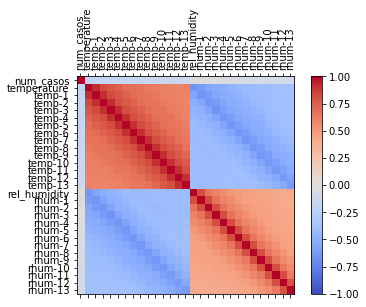

In [13]:
corr = df_corr
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_corr.columns)
ax.set_yticklabels(df_corr.columns)
plt.show()

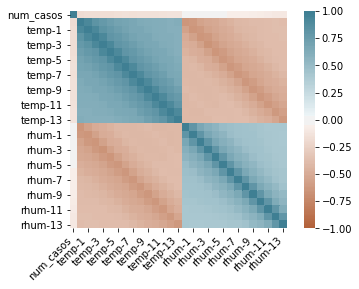

In [12]:
corr = df_corr
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [25]:
selected_corr.sort_values('num_casos', inplace=True)

In [33]:
selected_corr

,level_0,index,num_casos,colors
0,0,temperature,-0.172316,red
1,1,temp-1,-0.166735,red
2,2,temp-2,-0.164074,red
3,3,temp-3,-0.162864,red
4,4,temp-4,-0.158545,red
5,5,temp-7,-0.150109,red
6,6,temp-5,-0.148706,red
7,7,temp-6,-0.147835,red
8,8,temp-8,-0.143601,red
9,9,temp-9,-0.142355,red


In [112]:
selected_corr

,num_casos
temperature,-0.172316
temp-1,-0.166735
temp-2,-0.164074
temp-3,-0.162864
temp-4,-0.158545
temp-5,-0.148706
temp-6,-0.147835
temp-7,-0.150109
temp-8,-0.143601
temp-9,-0.142355


In [113]:
selected_pvalue

,num_casos
temperature,4.548794e-22
temp-1,9.575665e-21
temp-2,3.946650e-20
temp-3,7.456820e-20
temp-4,6.946291e-19
temp-5,8.904564e-17
temp-6,1.348016e-16
temp-7,4.545219e-17
temp-8,9.755250e-16
temp-9,1.727161e-15


In [120]:
selected = pd.concat([selected_corr, selected_pvalue], axis=1)
selected

,num_casos,num_casos
temperature,-0.172316,4.548794e-22
temp-1,-0.166735,9.575665e-21
temp-2,-0.164074,3.946650e-20
temp-3,-0.162864,7.456820e-20
temp-4,-0.158545,6.946291e-19
temp-5,-0.148706,8.904564e-17
temp-6,-0.147835,1.348016e-16
temp-7,-0.150109,4.545219e-17
temp-8,-0.143601,9.755250e-16
temp-9,-0.142355,1.727161e-15


In [56]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   level_0      28 non-null     int64  
 1   index        28 non-null     object 
 2   Correlation  28 non-null     float64
 3   P-value      28 non-null     float64
 4   Predictor    28 non-null     object 
 5   colors       28 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.4+ KB


In [121]:
selected.columns = ['Correlation', 'P-value']
selected

,Correlation,P-value
temperature,-0.172316,4.548794e-22
temp-1,-0.166735,9.575665e-21
temp-2,-0.164074,3.946650e-20
temp-3,-0.162864,7.456820e-20
temp-4,-0.158545,6.946291e-19
temp-5,-0.148706,8.904564e-17
temp-6,-0.147835,1.348016e-16
temp-7,-0.150109,4.545219e-17
temp-8,-0.143601,9.755250e-16
temp-9,-0.142355,1.727161e-15


##VISUALIZATION OF PEARSON'S CORRELATION

(<Figure size 2880x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe183491860>)

Text(0.5, 1.0, 'Correlation between predictors and the daily increment of number of COVID-19 cases')

Text(0, 0.5, "Pearson's correlation")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

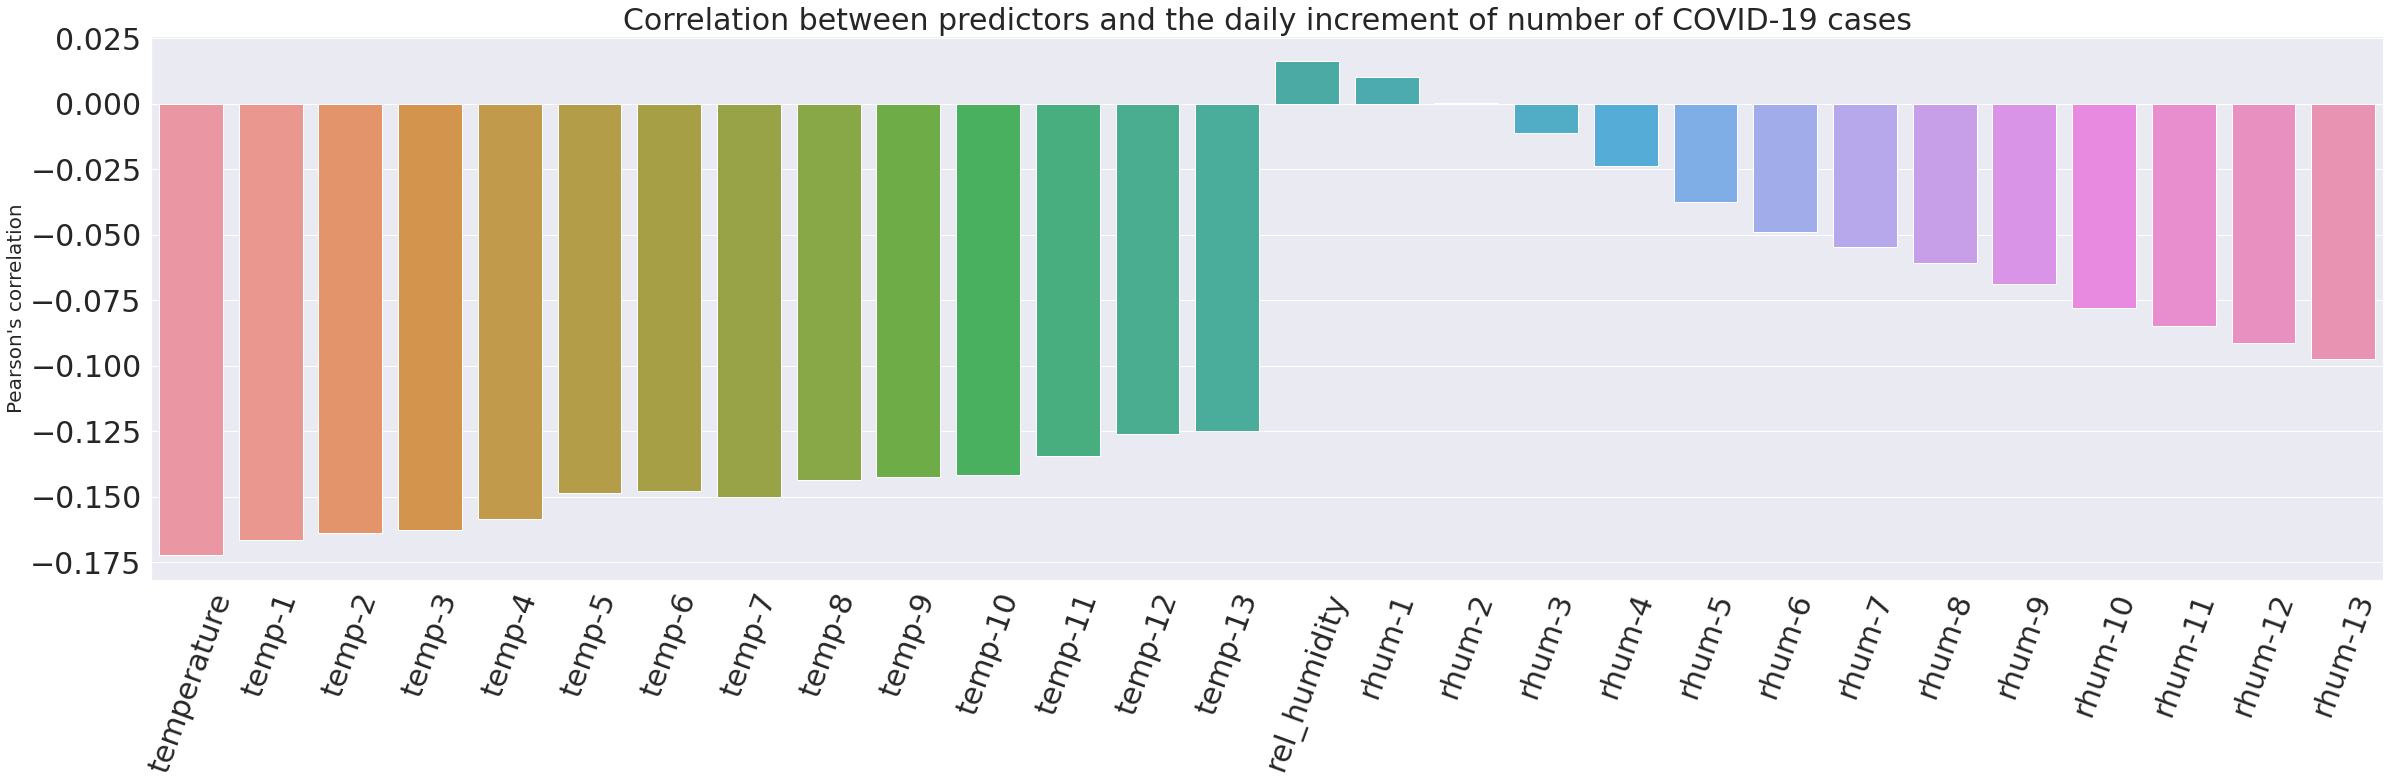

In [167]:
plt.subplots(figsize=(40,10))
b = sns.barplot(x= selected.index,y="Correlation",data=selected)
b.axes.set_title("Correlation between predictors and the daily increment of number of COVID-19 cases",fontsize=30)
b.axes.set_ylabel("Pearson's correlation", fontsize=20)
b.tick_params(labelsize=30, direction='out')
plt.xticks(rotation=70)

plt.show()

## Linear Regression
Multivariate model

In [87]:
import numpy as np
import pandas as pd

# Packages for checking assumptions
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)
sns.set()
sns.set(font_scale=1.5)

# Packages for checking assumptions
from scipy import stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
import statsmodels.api as sm

# Set jupyter notebook preferences
# the command below means that the output of multiple commands in a cell will be output at once.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# the command below tells jupyter to display up to 100 columns, this keeps everything visible
pd.set_option('display.max_columns', 100)
pd.set_option('expand_frame_repr', True)

In [88]:
df = pd.read_csv('/content/casos_temperatura_humedad.csv', index_col=0)
df

,fecha,cod_ine,num_casos,community,temperature,rel_humidity,temp-1,temp-2,temp-3,temp-4,temp-5,temp-6,temp-7,temp-8,temp-9,temp-10,temp-11,temp-12,temp-13,rhum-1,rhum-2,rhum-3,rhum-4,rhum-5,rhum-6,rhum-7,rhum-8,rhum-9,rhum-10,rhum-11,rhum-12,rhum-13
0,2020-01-31,1,0,ANDALUCIA,15.04,77.30,14.59,14.90,13.77,11.95,11.43,11.71,12.16,11.86,10.53,10.01,8.82,11.16,13.56,72.95,78.48,80.03,78.26,78.39,86.95,84.22,84.22,85.16,71.91,63.81,73.56,82.60
1,2020-01-31,2,0,ARAGON,15.18,78.11,14.19,14.14,13.37,9.78,10.47,10.23,10.34,9.34,9.50,7.64,4.89,8.07,10.06,77.92,80.13,78.86,81.67,81.26,87.26,84.18,88.80,87.69,85.30,70.67,76.63,76.78
2,2020-01-31,3,0,ASTURIAS,16.58,76.16,15.48,14.36,11.51,12.70,11.94,10.45,11.20,9.64,8.13,5.75,4.41,6.67,10.10,76.13,80.76,74.50,71.12,71.29,84.23,76.29,85.44,91.73,81.44,76.04,82.78,74.03
3,2020-01-31,4,0,ISLAS BALEARES,14.61,78.74,14.18,14.71,13.84,12.19,12.65,12.80,12.43,12.59,13.90,13.41,11.52,11.52,12.16,84.77,83.39,78.81,77.14,86.17,86.26,80.66,81.42,86.70,87.40,86.28,86.30,65.56
4,2020-01-31,5,0,ISLAS CANARIAS,21.65,31.21,21.94,20.67,16.36,15.24,15.78,15.85,15.70,15.34,15.04,15.17,15.68,16.88,16.57,36.93,50.99,74.00,70.69,67.45,70.22,74.59,71.57,63.93,62.65,72.46,76.61,69.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,2020-07-11,15,26,COMUNIDAD DE NAVARRA,19.59,73.39,18.86,23.30,23.26,18.19,17.59,21.46,18.46,15.93,17.42,21.31,22.66,18.43,21.01,85.66,81.48,71.19,76.99,83.86,65.32,69.01,77.01,85.77,86.11,73.17,83.01,78.44
3093,2020-07-11,16,14,PAIS VASCO,18.48,76.90,17.89,20.13,20.34,17.41,16.72,20.19,18.19,15.73,16.08,19.10,20.12,17.27,19.26,87.15,84.41,77.04,76.74,85.85,69.47,68.97,76.96,88.50,84.89,77.24,84.24,81.30
3094,2020-07-11,17,3,LA RIOJA,21.20,67.75,20.73,25.23,25.89,21.32,19.47,24.51,21.19,17.12,18.68,23.88,25.11,20.92,23.17,80.68,69.30,58.01,59.89,77.55,55.72,55.56,71.20,83.87,73.32,66.19,78.26,71.36
3095,2020-07-11,18,0,CEUTA,21.60,90.17,21.12,21.45,23.45,24.68,22.70,21.22,20.31,25.09,24.59,24.59,22.03,21.26,24.22,71.87,66.94,65.65,43.96,62.66,84.45,89.26,45.08,59.04,59.11,71.57,68.01,56.49


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3097 entries, 0 to 3096
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fecha         3097 non-null   object 
 1   cod_ine       3097 non-null   int64  
 2   num_casos     3097 non-null   int64  
 3   community     3097 non-null   object 
 4   temperature   3097 non-null   float64
 5   rel_humidity  3097 non-null   float64
 6   temp-1        3097 non-null   float64
 7   temp-2        3097 non-null   float64
 8   temp-3        3097 non-null   float64
 9   temp-4        3097 non-null   float64
 10  temp-5        3097 non-null   float64
 11  temp-6        3097 non-null   float64
 12  temp-7        3097 non-null   float64
 13  temp-8        3097 non-null   float64
 14  temp-9        3097 non-null   float64
 15  temp-10       3097 non-null   float64
 16  temp-11       3097 non-null   float64
 17  temp-12       3097 non-null   float64
 18  temp-13       3097 non-null 

Text(0.5, 1.0, 'Scatter plot of number of cases vs average temperature')

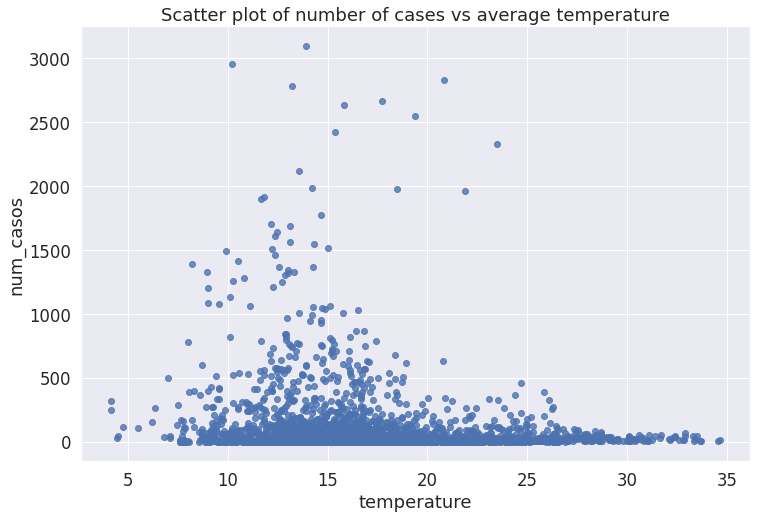

In [65]:
# plot number of cases vs. temperature (average temperature)
ax = sns.regplot(x='temperature', y='num_casos', data=df, fit_reg=False)
ax.set_title('Scatter plot of number of cases vs average temperature')

Text(0.5, 1.0, 'Scatter plot of number of cases vs relative humidity (%)')

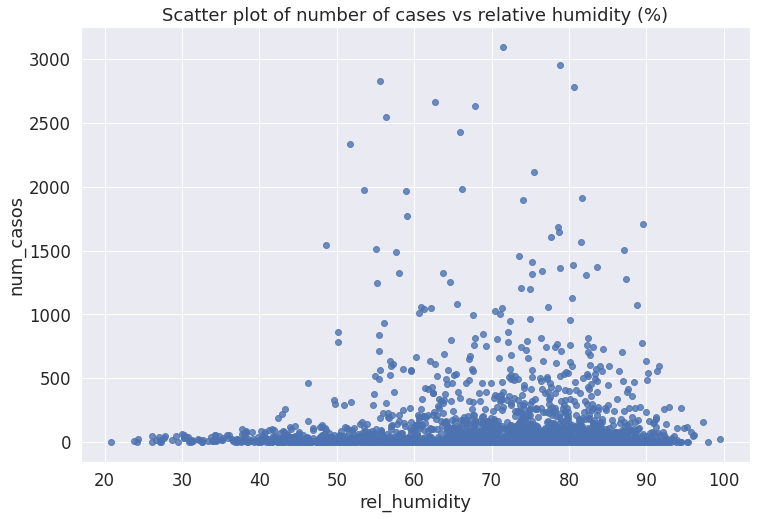

In [66]:
# plot number of cases vs. relative humidity
ax = sns.regplot(x='rel_humidity', y='num_casos', data=df, fit_reg=False)
ax.set_title('Scatter plot of number of cases vs relative humidity (%)')

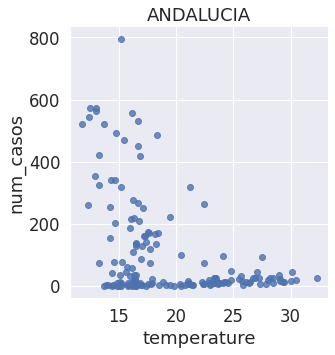

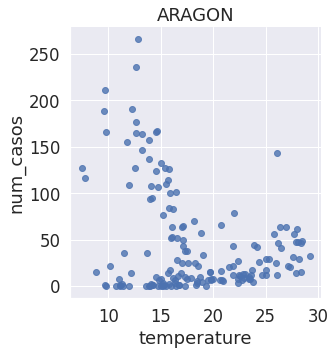

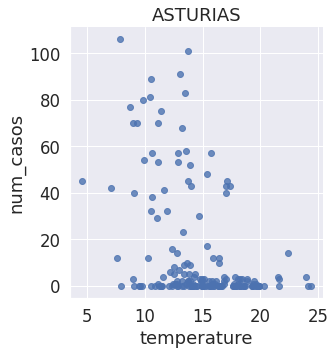

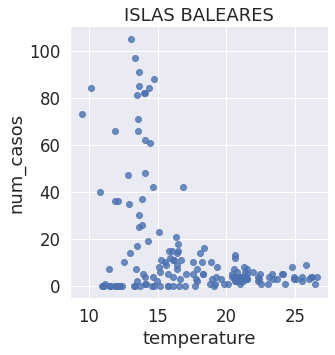

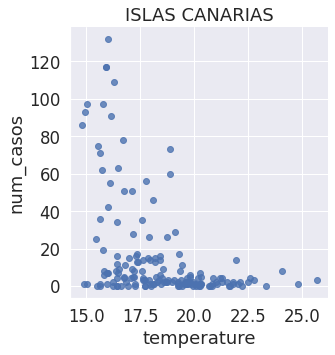

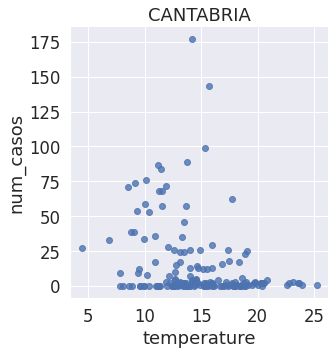

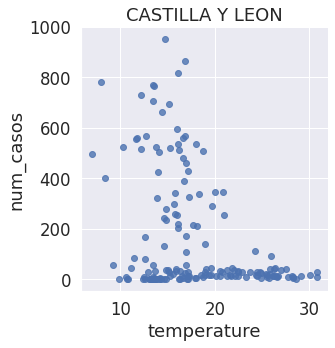

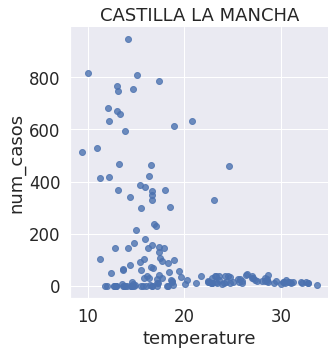

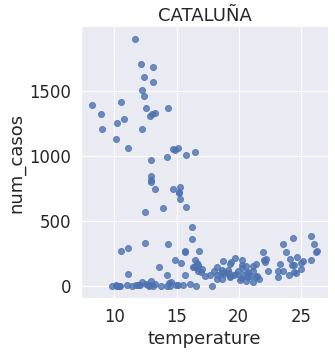

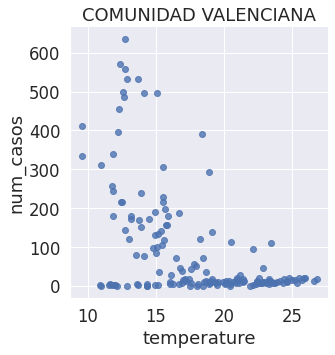

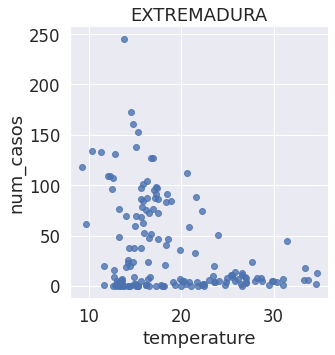

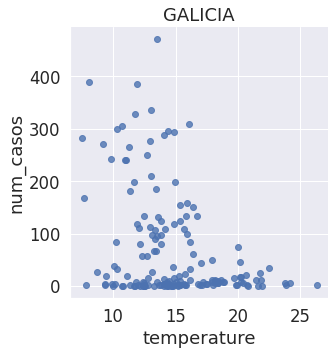

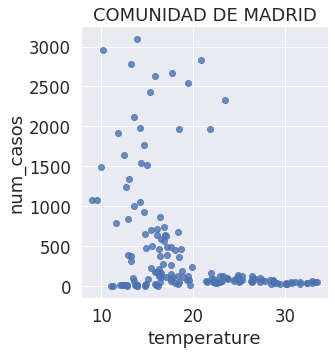

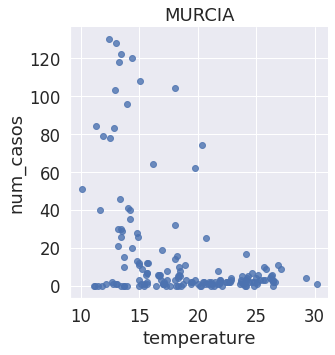

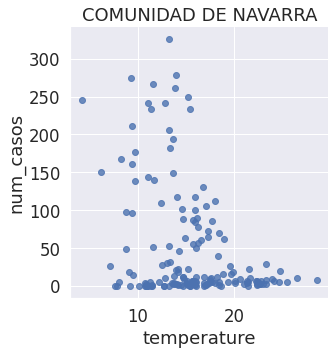

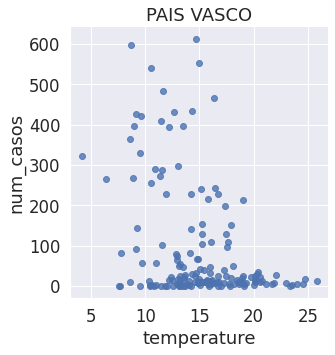

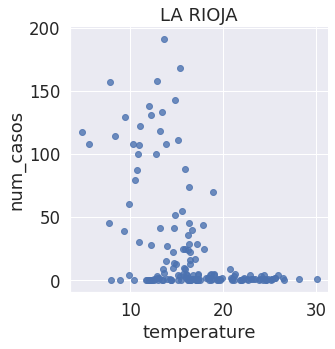

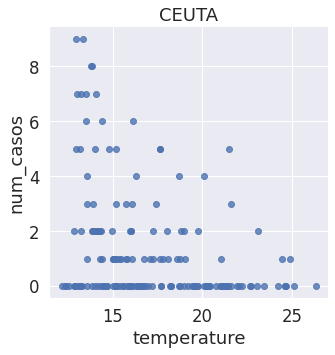

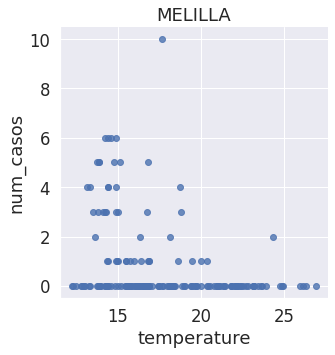

In [67]:
#Plot number of cases vs temperature for each autonomous community
for ccaa in df['community'].unique():
    ax = sns.lmplot(x='temperature', y='num_casos', data=df[df['community']==ccaa], fit_reg=False)
    ax = plt.gca()
    ax.set_title(ccaa)

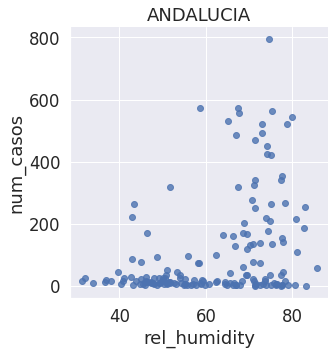

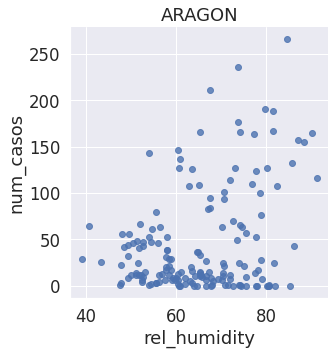

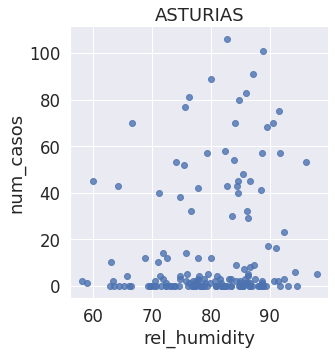

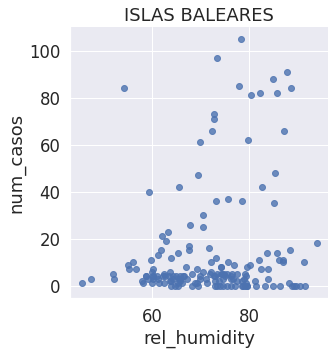

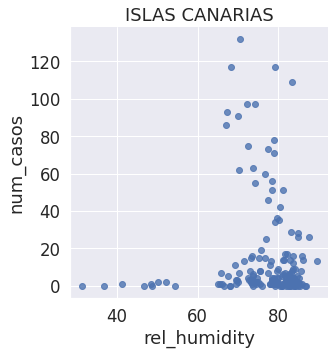

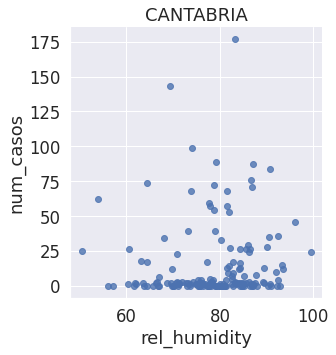

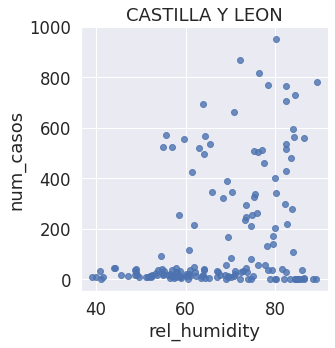

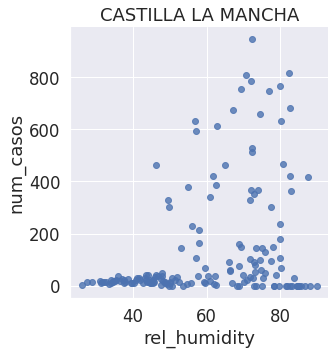

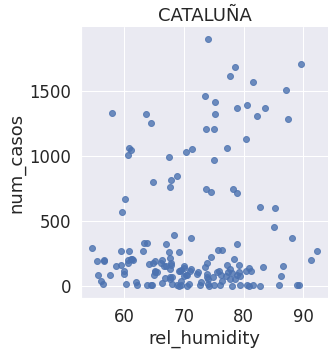

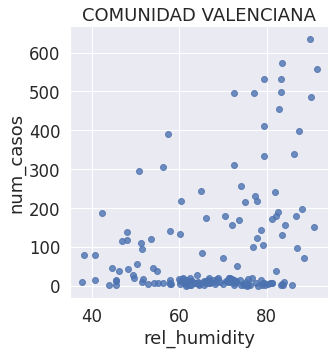

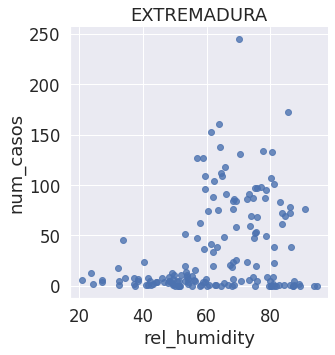

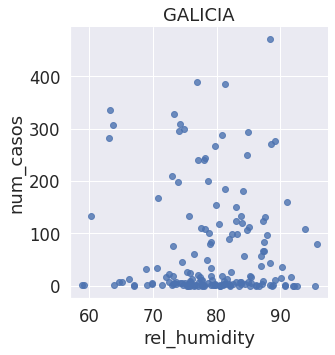

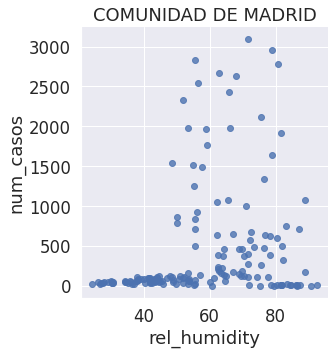

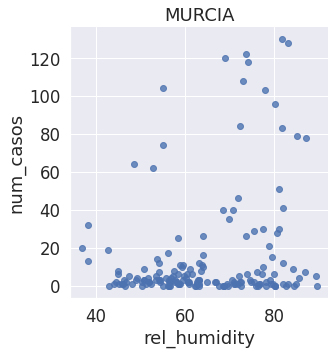

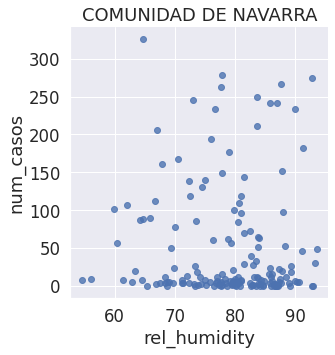

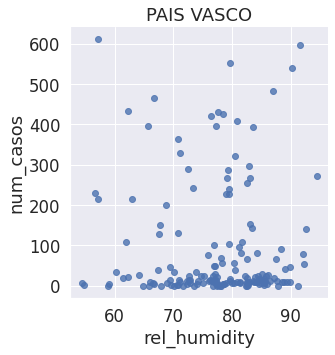

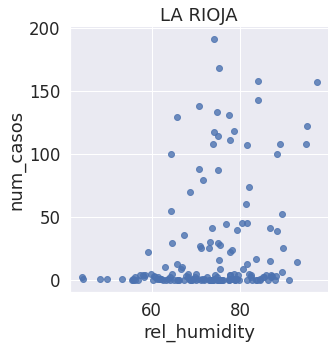

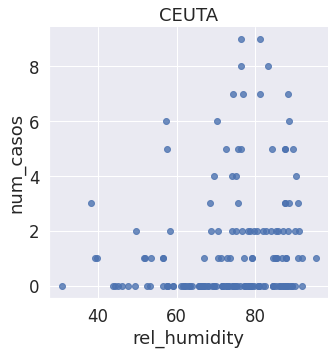

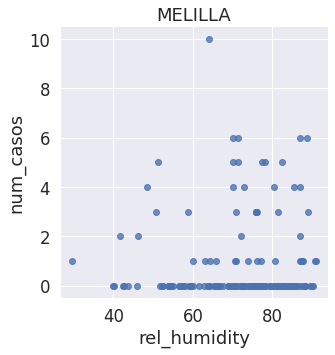

In [68]:
#Plot number of cases vs relative humidity for each autonomous community
for ccaa in df['community'].unique():
    ax = sns.lmplot(x='rel_humidity', y='num_casos', data=df[df['community']==ccaa], fit_reg=False)
    ax = plt.gca()
    ax.set_title(ccaa)

### Temperature

In [90]:
# Define our dependent variable
y_column = 'num_casos'
y = df['num_casos']
# Define  our independent variables
x_columns = ['temperature']
X = df[['temperature']]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['cnst'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(endog = y_train,exog = X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              num_casos   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     75.47
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           6.63e-18
Time:                        11:54:47   Log-Likelihood:                -17146.
No. Observations:                2477   AIC:                         3.430e+04
Df Residuals:                    2475   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature    -8.7265      1.005     -8.687      

### Relative humidity

In [91]:
# Define our dependent variable
y_column = 'num_casos'
y = df['num_casos']
# Define  our independent variables
x_columns = ['rel_humidity']
X = df[['rel_humidity']]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['cnst'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(endog = y_train,exog = X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              num_casos   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.001
Date:                Mon, 20 Jul 2020   Prob (F-statistic):              0.157
Time:                        13:06:30   Log-Likelihood:                -17182.
No. Observations:                2477   AIC:                         3.437e+04
Df Residuals:                    2475   BIC:                         3.438e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
rel_humidity     0.5125      0.362      1.414   

### Temperature and relative humidity

In [92]:
# Define our dependent variable
y_column = 'num_casos'
y = df['num_casos']
# Define  our independent variables
x_columns = ['temperature','rel_humidity']
X = df[['temperature','rel_humidity']]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['cnst'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(endog = y_train,exog = X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              num_casos   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     54.25
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           8.75e-24
Time:                        13:10:30   Log-Likelihood:                -17130.
No. Observations:                2477   AIC:                         3.427e+04
Df Residuals:                    2474   BIC:                         3.428e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
temperature    -13.6264      1.321    -10.316   

### 1-day lag average temperature and relative humidity 

In [93]:
# Define our dependent variable
y_column = 'num_casos'
y = df['num_casos']
# Define  our independent variables
x_columns = ['temp-1','rhum-1']
X = df[['temp-1','rhum-1']]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['cnst'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(endog = y_train,exog = X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              num_casos   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     56.76
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           7.92e-25
Time:                        13:13:36   Log-Likelihood:                -17127.
No. Observations:                2477   AIC:                         3.426e+04
Df Residuals:                    2474   BIC:                         3.428e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp-1       -13.9654      1.321    -10.568      0.0

### 2-day lag average temperature and relative humidity 

In [94]:
# Define our dependent variable
y_column = 'num_casos'
y = df['num_casos']
# Define  our independent variables
x_columns = ['temp-2','rhum-2']
X = df[['temp-2','rhum-2']]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['cnst'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(endog = y_train,exog = X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              num_casos   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     61.10
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           1.26e-26
Time:                        13:14:37   Log-Likelihood:                -17123.
No. Observations:                2477   AIC:                         3.425e+04
Df Residuals:                    2474   BIC:                         3.427e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp-2       -14.7182      1.333    -11.044      0.0

### 3-day lag average temperature and relative humidity 

In [95]:
# Define our dependent variable
y_column = 'num_casos'
y = df['num_casos']
# Define  our independent variables
x_columns = ['temp-3','rhum-3']
X = df[['temp-3','rhum-3']]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['cnst'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(endog = y_train,exog = X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              num_casos   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     65.50
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           1.91e-28
Time:                        13:15:09   Log-Likelihood:                -17119.
No. Observations:                2477   AIC:                         3.424e+04
Df Residuals:                    2474   BIC:                         3.426e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp-3       -15.3457      1.341    -11.446      0.0

### 4-day lag average temperature and relative humidity 

In [106]:
# Define our dependent variable
y_column = 'num_casos'
y = df['num_casos']
# Define  our independent variables
x_columns = ['temp-4','rhum-4']
X = df[['temp-4','rhum-4']]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['cnst'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(endog = y_train,exog = X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              num_casos   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     70.97
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           1.07e-30
Time:                        13:20:33   Log-Likelihood:                -17114.
No. Observations:                2477   AIC:                         3.423e+04
Df Residuals:                    2474   BIC:                         3.425e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp-4       -15.9572      1.342    -11.887      0.0

### 5-day lag average temperature and relative humidity 

In [97]:
# Define our dependent variable
y_column = 'num_casos'
y = df['num_casos']
# Define  our independent variables
x_columns = ['temp-5','rhum-5']
X = df[['temp-5','rhum-5']]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['cnst'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(endog = y_train,exog = X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              num_casos   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     69.68
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           3.64e-30
Time:                        13:16:10   Log-Likelihood:                -17115.
No. Observations:                2477   AIC:                         3.424e+04
Df Residuals:                    2474   BIC:                         3.425e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp-5       -15.5777      1.334    -11.675      0.0

### 6-day lag average temperature and relative humidity 

In [98]:
# Define our dependent variable
y_column = 'num_casos'
y = df['num_casos']
# Define  our independent variables
x_columns = ['temp-6','rhum-6']
X = df[['temp-6','rhum-6']]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['cnst'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(endog = y_train,exog = X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              num_casos   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     74.90
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           2.62e-32
Time:                        13:16:44   Log-Likelihood:                -17110.
No. Observations:                2477   AIC:                         3.423e+04
Df Residuals:                    2474   BIC:                         3.424e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp-6       -16.2270      1.347    -12.050      0.0

### 7-day lag average temperature and relative humidity 

In [99]:
# Define our dependent variable
y_column = 'num_casos'
y = df['num_casos']
# Define  our independent variables
x_columns = ['temp-7','rhum-7']
X = df[['temp-7','rhum-7']]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['cnst'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(endog = y_train,exog = X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              num_casos   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     77.04
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           3.50e-33
Time:                        13:17:15   Log-Likelihood:                -17108.
No. Observations:                2477   AIC:                         3.422e+04
Df Residuals:                    2474   BIC:                         3.424e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp-7       -16.4860      1.354    -12.178      0.0

### 8-day lag average temperature and relative humidity 

In [100]:
# Define our dependent variable
y_column = 'num_casos'
y = df['num_casos']
# Define  our independent variables
x_columns = ['temp-8','rhum-8']
X = df[['temp-8','rhum-8']]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['cnst'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(endog = y_train,exog = X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              num_casos   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     80.58
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           1.25e-34
Time:                        13:17:41   Log-Likelihood:                -17105.
No. Observations:                2477   AIC:                         3.422e+04
Df Residuals:                    2474   BIC:                         3.423e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp-8       -16.4180      1.336    -12.292      0.0

### 9-day lag average temperature and relative humidity 

In [101]:
# Define our dependent variable
y_column = 'num_casos'
y = df['num_casos']
# Define  our independent variables
x_columns = ['temp-9','rhum-9']
X = df[['temp-9','rhum-9']]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['cnst'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(endog = y_train,exog = X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              num_casos   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     87.40
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           2.10e-37
Time:                        13:18:11   Log-Likelihood:                -17098.
No. Observations:                2477   AIC:                         3.420e+04
Df Residuals:                    2474   BIC:                         3.422e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp-9       -16.9756      1.337    -12.699      0.0

### 10-day lag average temperature and relative humidity 

In [102]:
# Define our dependent variable
y_column = 'num_casos'
y = df['num_casos']
# Define  our independent variables
x_columns = ['temp-10','rhum-10']
X = df[['temp-10','rhum-10']]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['cnst'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(endog = y_train,exog = X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              num_casos   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     95.10
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           1.61e-40
Time:                        13:18:39   Log-Likelihood:                -17091.
No. Observations:                2477   AIC:                         3.419e+04
Df Residuals:                    2474   BIC:                         3.421e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp-10      -17.3621      1.336    -13.000      0.0

### 11-day lag average temperature and relative humidity 

In [103]:
# Define our dependent variable
y_column = 'num_casos'
y = df['num_casos']
# Define  our independent variables
x_columns = ['temp-11','rhum-11']
X = df[['temp-11','rhum-11']]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['cnst'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(endog = y_train,exog = X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              num_casos   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     93.88
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           5.05e-40
Time:                        13:19:03   Log-Likelihood:                -17092.
No. Observations:                2477   AIC:                         3.419e+04
Df Residuals:                    2474   BIC:                         3.421e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp-11      -16.7868      1.311    -12.804      0.0

### 12-day lag average temperature and relative humidity 

In [107]:
# Define our dependent variable
y_column = 'num_casos'
y = df['num_casos']
# Define  our independent variables
x_columns = ['temp-12','rhum-12']
X = df[['temp-12','rhum-12']]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['cnst'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(endog = y_train,exog = X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              num_casos   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     103.7
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           5.83e-44
Time:                        13:27:38   Log-Likelihood:                -17083.
No. Observations:                2477   AIC:                         3.417e+04
Df Residuals:                    2474   BIC:                         3.419e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp-12      -17.2050      1.307    -13.161      0.0

### 13-day lag average temperature and relative humidity 

In [105]:
# Define our dependent variable
y_column = 'num_casos'
y = df['num_casos']
# Define  our independent variables
x_columns = ['temp-13','rhum-13']
X = df[['temp-13','rhum-13']]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['cnst'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(endog = y_train,exog = X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              num_casos   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     101.1
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           6.04e-43
Time:                        13:19:52   Log-Likelihood:                -17086.
No. Observations:                2477   AIC:                         3.418e+04
Df Residuals:                    2474   BIC:                         3.419e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp-13      -16.9976      1.309    -12.984      0.0

### Model evaluation
With 12-day lag average temperature and relative humidity

In [108]:
# Initialize the model. We set fit_intercept as false as we already have the constant included in our data. 
linear = LinearRegression(fit_intercept=False)
# Use the cross_val_sore function to calculate the r2 cross validation
r2_cross_val_score = cross_val_score(linear, X_train, y_train, cv = 5).mean()
# Results!
print('cross validation R2: {}'.format(r2_cross_val_score))

cross validation R2: 0.07671896120720167


The cross validation R2 score is very similar to the training R2 which gives us confidence that the model will perform well on the unseen test data.

In [111]:
# make MSE scorer
mse_scorer = make_scorer(mean_squared_error)
# use the cross_val_score function to calculate to the cross validated MSE
mse_cross_val_score = cross_val_score(linear, X_train, y_train, scoring=mse_scorer, cv =5).mean()
# Results!
print(f'cross validation MSE: {mse_cross_val_score:.6}')
print(f'cross validation RMSE: {np.sqrt(mse_cross_val_score):.4}')

cross validation MSE: 57414.1
cross validation RMSE: 239.6


This suggests that the average error in our model is 239 confirmed cases.

Due to the very low value of the R^2 coeficcients, the linear regression model is not suitable for analysis. Other models would have to be studied. 